# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import os ; import sys
sys.path.insert(0, os.path.abspath(os.path.join('./lib')))

import utilities
import directed_connectivity
import ignition_rebound
import cross_frequency
import network_geometry
import harmonics
import entanglement_geometry
import pac_multiplexing
import criticality
import connectome_harmonics
import directional_coupling
import surface_cuts
import emergent_geometry
import temporal_holography
import toroidal_phase
import frequency_domain_coupling
import information_flow
import network_coupling
import hidden_markov
import attractor_topology
import entanglement_entropy
import resonant_modes
import informational_geometry
import causal_routing
import schumann_coherence
import harmonic_resonance
import attractor_geometry
import chaos_metrics
import multiscale_entropy_and_fractal_scaling
import network_graph_hubs
import microstate_segmentation
import cross_frequency_region_coupling
import dynamic_connectivity_metastability
import harmonic_coherence
import synchrosqueeze
import harmonic_locking
import temporal_dynamics
import shape_vs_resonance
import cross_frequency_harmonics
import spatial_source_harmonics
import directionality_harmonics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Load Data

In [2]:
ELECTRODES = ['AF3','AF4','F7','F8','F3','F4','FC5','FC6','P7','P8','T7','T8','O1','O2']
RANGES  = {'Delta':[1,4],'Theta':[4,8],'Alpha':[8,12],'BetaL':[12,16], 'BetaH':[16,25],'Gamma':[25,45]}

In [3]:
FILENAME = "data/test schumann_EPOCX_111270_2023.04.23T14.50.35.05.00.md.pm.bp.csv"
FS = 128

RECORDS = utilities.load_eeg_csv(FILENAME, electrodes=ELECTRODES)
RECORDS

Timestamp  EEG.Counter  EEG.Interpolated      EEG.AF3       EEG.F7  \
0        0.000000         21.0               0.0  4361.153809  4305.897461   
1        0.007704         22.0               0.0  4361.666504  4300.641113   
2        0.015708         23.0               0.0  4350.384766  4284.615234   
3        0.023412         24.0               0.0  4346.794922  4278.846191   
4        0.031316         25.0               0.0  4353.717773  4280.384766   
...           ...          ...               ...          ...          ...   
88850  693.752160         39.0               0.0  4296.666504  4265.000000   
88851  693.760067         40.0               0.0  4291.538574  4260.384766   
88852  693.767973         41.0               0.0  4293.717773  4270.897461   
88853  693.775880         42.0               0.0  4309.358887  4288.205078   
88854  693.783687         43.0               0.0  4323.717773  4284.487305   

            EEG.F3      EEG.FC5       EEG.T7       EEG.P7       EEG.O1  ...  \
0      4336.922852  4345.769043  4344.743652  4277.179688  4284.615234  ...   
1      4334.358887  4335.000000  4346.282227  4277.179688  4287.051270  ...   
2      4326.025879  4322.692383  4334.487305  4277.307617  4285.512695  ...   
3      4334.230957  4323.333496  4330.641113  4277.692383  4280.769043  ...   
4      4345.000000  4327.436035  4338.205078  4278.077148  4280.000000  ...   
...            ...          ...          ...          ...          ...  ...   
88850  4313.333496  4299.743652  4343.461426  4267.948730  4265.769043  ...   
88851  4302.436035  4296.025879  4341.282227  4269.358887  4255.641113  ...   
88852  4298.077148  4309.871582  4343.461426  4272.563965  4253.717773  ...   
88853  4310.384766  4323.077148  4352.051270  4280.000000  4266.922852  ...   
88854  4313.589844  4312.563965  4345.256348  4281.410156  4272.179688  ...   

       EEG.O2.BetaH.BIN  EEG.O2.Gamma  POW.EEG.O2.Gamma  EEG.O2.Gamma.BIN  \
0                     1      0.002424          0.000006                 0   
1                     0      2.579016          6.651323                 0   
2                     0     -0.612538          0.375202                 1   
3                     0     -1.132113          1.281680                 1   
4                     1      0.972215          0.945202                 0   
...                 ...           ...               ...               ...   
88850                 0      0.553583          0.306454                 0   
88851                 1     -0.853158          0.727878                 1   
88852                 1     -1.592120          2.534846                 1   
88853                 1      1.689099          2.853056                 0   
88854                 1     -0.032886          0.001082                 1   

       POW.EEG.O2.Delta.REL  POW.EEG.O2.Theta.REL  POW.EEG.O2.Alpha.REL  \
0                  0.169807              0.026432              0.738918   
1                  0.046686              0.041598              0.049372   
2                  0.076558              0.093661              0.034900   
3                  0.200288              0.232147              0.025471   
4                  0.338600              0.311681              0.000616   
...                     ...                   ...                   ...   
88850              0.033341              0.012156              0.000032   
88851              0.358001              0.084260              0.043122   
88852              0.020924              0.002822              0.006819   
88853              0.019529              0.001202              0.007590   
88854              0.636267              0.010101              0.172670   

       POW.EEG.O2.BetaL.REL  POW.EEG.O2.BetaH.REL  POW.EEG.O2.Gamma.REL  
0                  0.050399              0.014441              0.000004  
1                  0.168686              0.577961              0.115696  
2                  0.294788              0.496205              0.003887  


# PSD & Relative Band Power

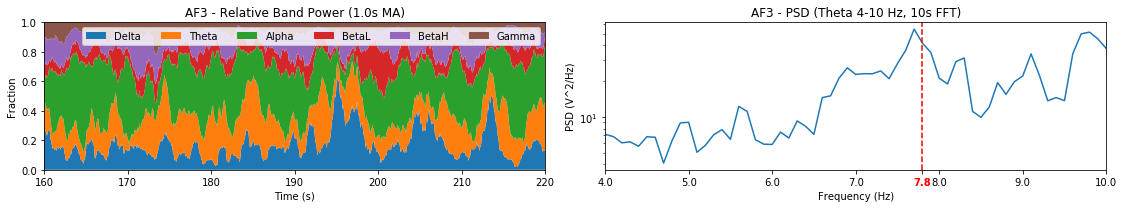

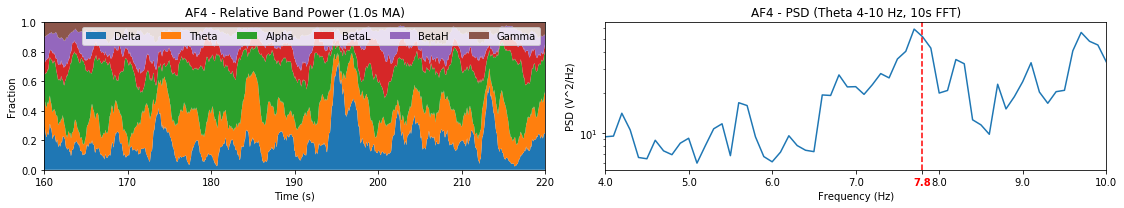

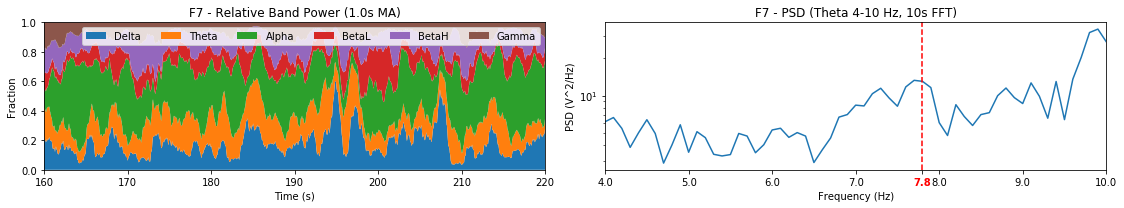

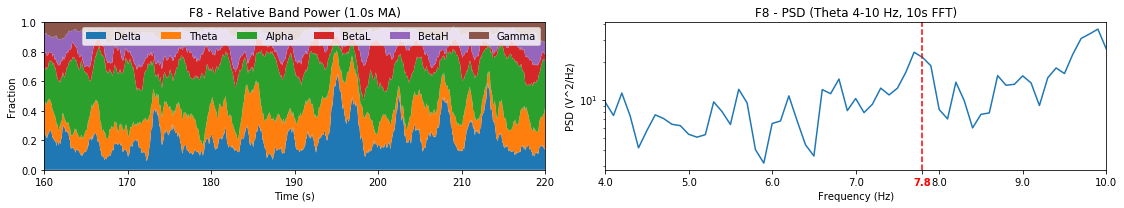

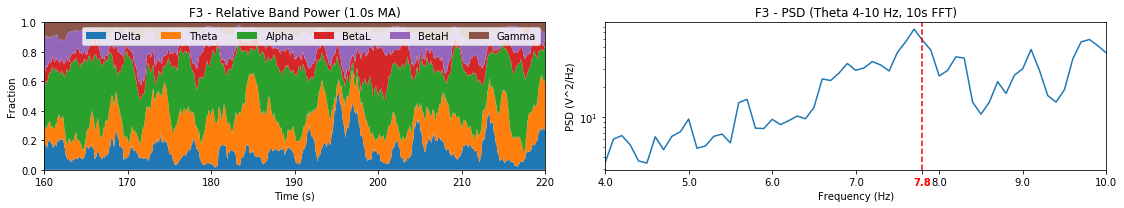

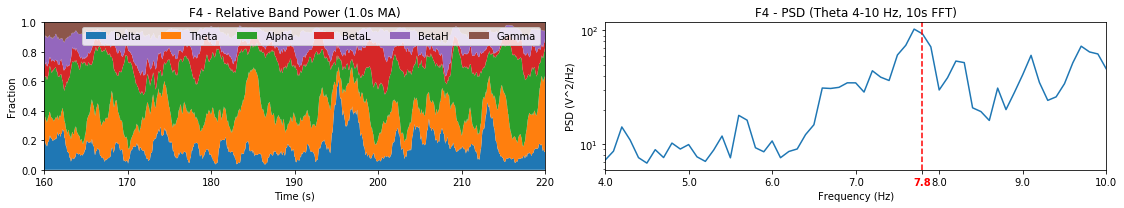

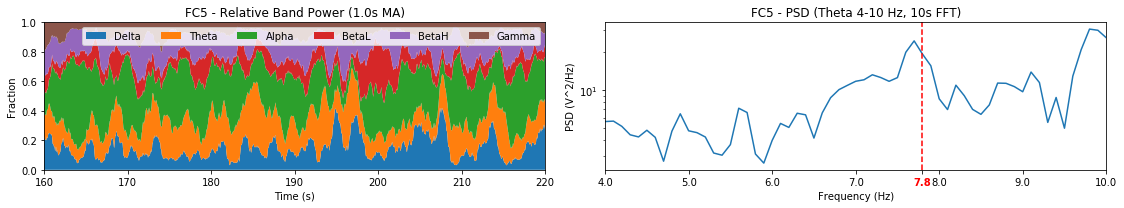

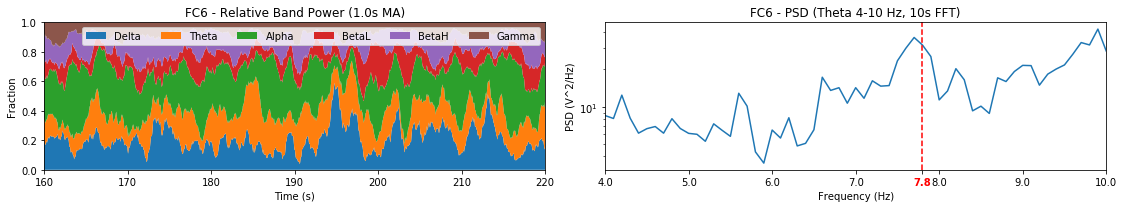

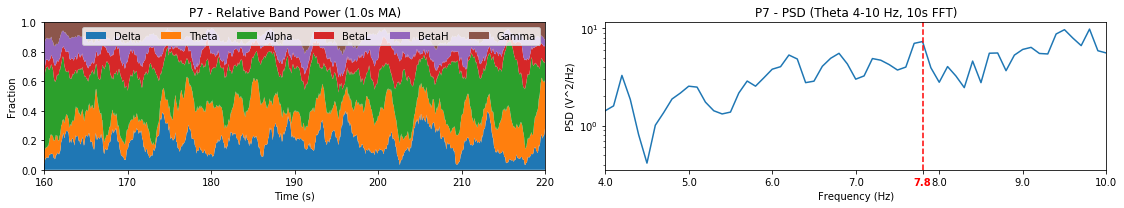

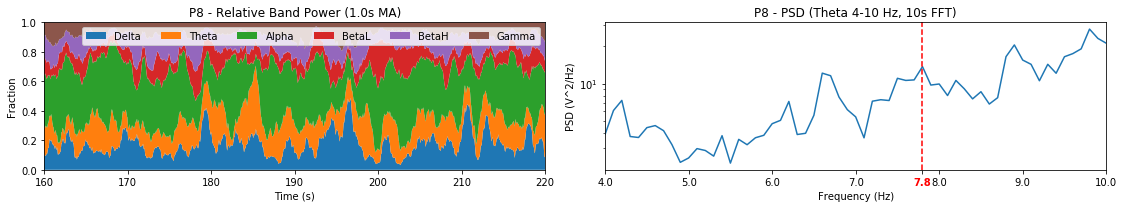

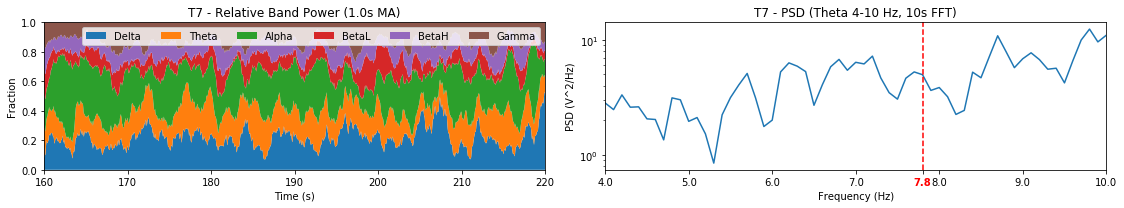

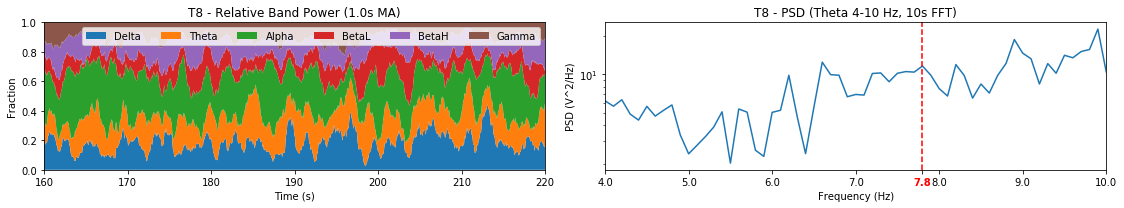

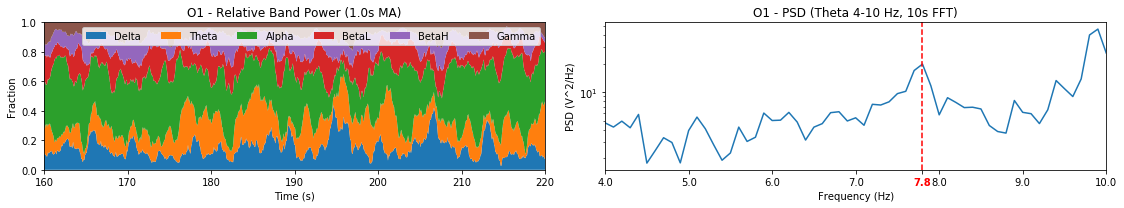

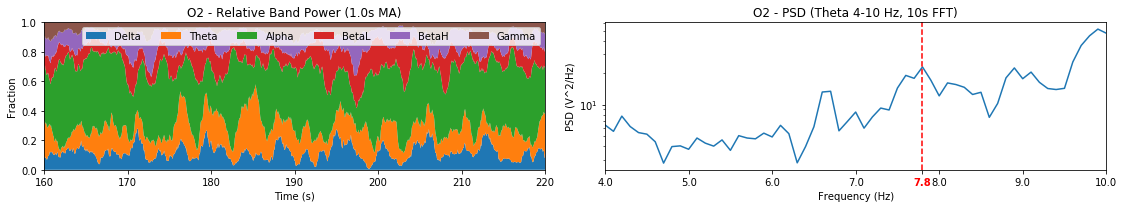

In [4]:
utilities.plot_stacked_relpower_timeseries(
    RECORDS,ELECTRODES,
    start_sec=160, 
    end_sec=220, 
    smooth_sec=1.0, 
    psd_fft_win=10
)

# Individual Alpha Frequency (IAF)

In [5]:
# --- Example usage (uncomment and adjust your variables) ---
iaf_results, iaf_summary = utilities.compute_iaf(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=180,
    end_sec=200,
    alpha_band=(7.0, 13.0),
    roi=("O1","O2","F3","F4","P7","P8"),
    psd_fft_win=10.0,
    psd_overlap=0.1,
    smooth_hz=0.1,
)
display(iaf_results)
print(iaf_summary)

electrode  PAF_Hz    CoG_Hz  alpha_power
0        AF3     7.7  8.750627   166.512932
1        AF4     7.8  8.686384   182.611381
2         F7     7.3  9.134896    83.852915
3         F8     7.8  9.020431   101.246403
4         F3     7.7  8.511908   209.388428
5         F4     7.8  8.450644   292.456748
6        FC5     7.7  8.854006    95.881375
7        FC6     7.7  8.744505   137.284892
8         P7     7.7  9.026772    23.605550
9         P8     7.8  9.327374    75.485869
10        T7    10.0  9.429018    37.647879
11        T8     7.8  9.103812    61.849727
12        O1     7.7  9.429724    67.181830
13        O2     7.8  9.596313   135.338885

{'ROI_electrodes_used': ['F3', 'F4', 'P7', 'P8', 'O1', 'O2'], 'PAF_median_Hz': 7.75, 'PAF_mean_Hz': 7.75, 'CoG_median_Hz': 9.177073078835393, 'CoG_mean_Hz': 9.057122586086253}


# Animate Theta/Alpha PSD

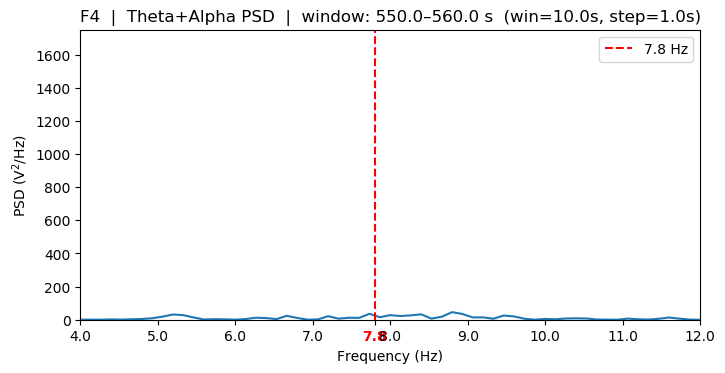

In [6]:
# --- Example usage (per electrode) ---
for electrode in ['F4']:
    anim = utilities.animate_theta_alpha_psd(
        df=RECORDS,
        electrode=electrode,
        fs=FS,
        start_sec=550,
        end_sec=580,
        win_sec=10,
        step_sec=1,
        psd_fft_win=7.5,
        psd_overlap=0.1,
        band=(4,12),
        dpi=100,
        show_legend=True,
        save_path=electrode+".gif"
    )
from IPython.display import HTML
HTML(anim.to_jshtml())

# Global Field Potential (GFP) - Theta/Alpha

Empty DataFrame
Columns: []
Index: []

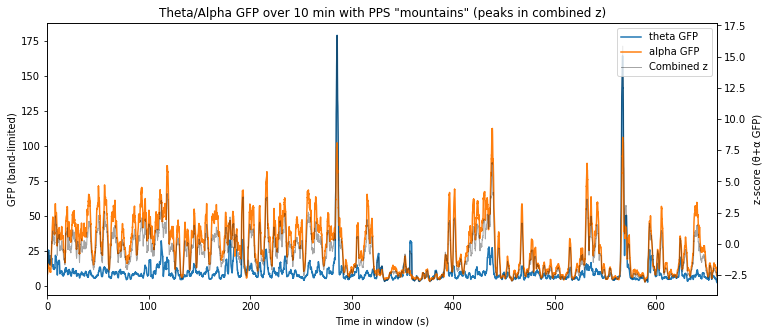

In [7]:
# Example usage (after RECORDS/ELECTRODES/FS are defined):
out = utilities.plot_pps_mountains(RECORDS, ELECTRODES, FS, start_sec=0, duration_sec=660,
                         bands=("theta","alpha"), smooth_sec=2.0,
                         baseline_first_sec=60, z_thresh=2.5,
                         prominence=0.5, min_width_sec=5, min_distance_sec=10,
                         use_existing_cols=True)
display(out['peaks'])

# (1/f) Aperiodic Slope

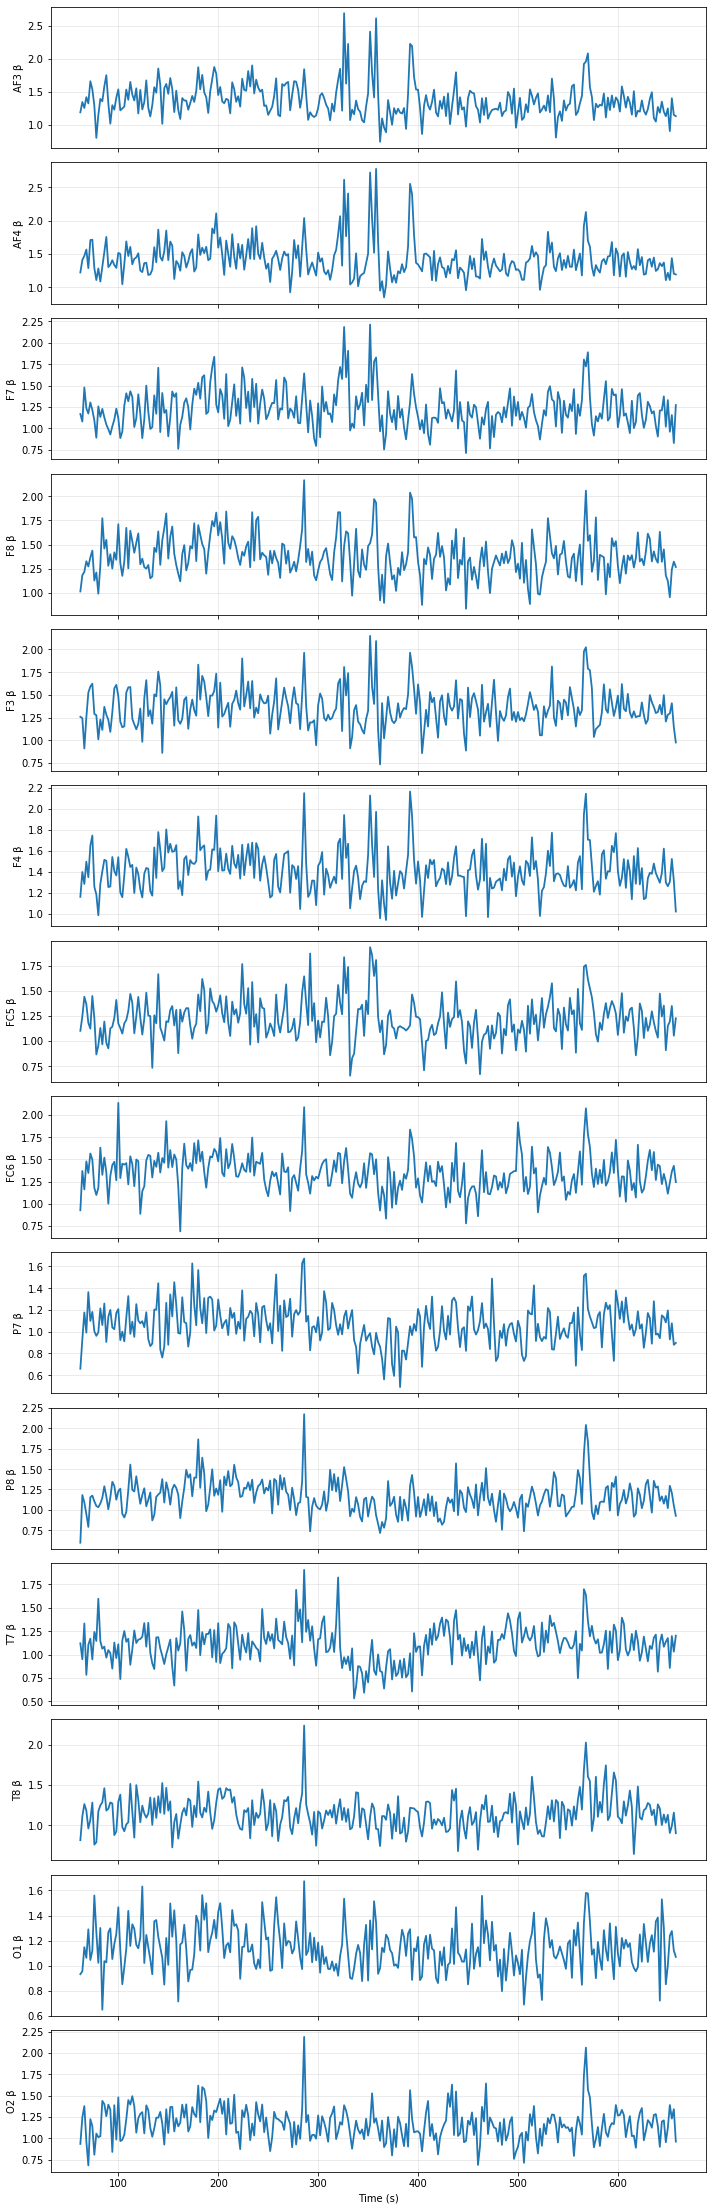

(<Figure size 720x2217.6 with 14 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c8dcf0d0>,
       dtype=object))

In [8]:
utilities.plot_aperiodic_slope_timeseries(
    df=RECORDS,
    electrodes=ELECTRODES,
    fs=FS,
    start_sec=60,
    end_sec=660,
    win_sec=4.0,
    step_sec=2.0,
    fmin=1.0,
    fmax=45.0,
    exclude_bands_for_fit=((8,13),(18,25)),
    ylim=None,             # or e.g. (0.6, 2.0)
    figsize=(10, 2.2)      # height per subplot; total height = 2.2 * n_electrodes
)

# EEG Band Timelines by Electrode

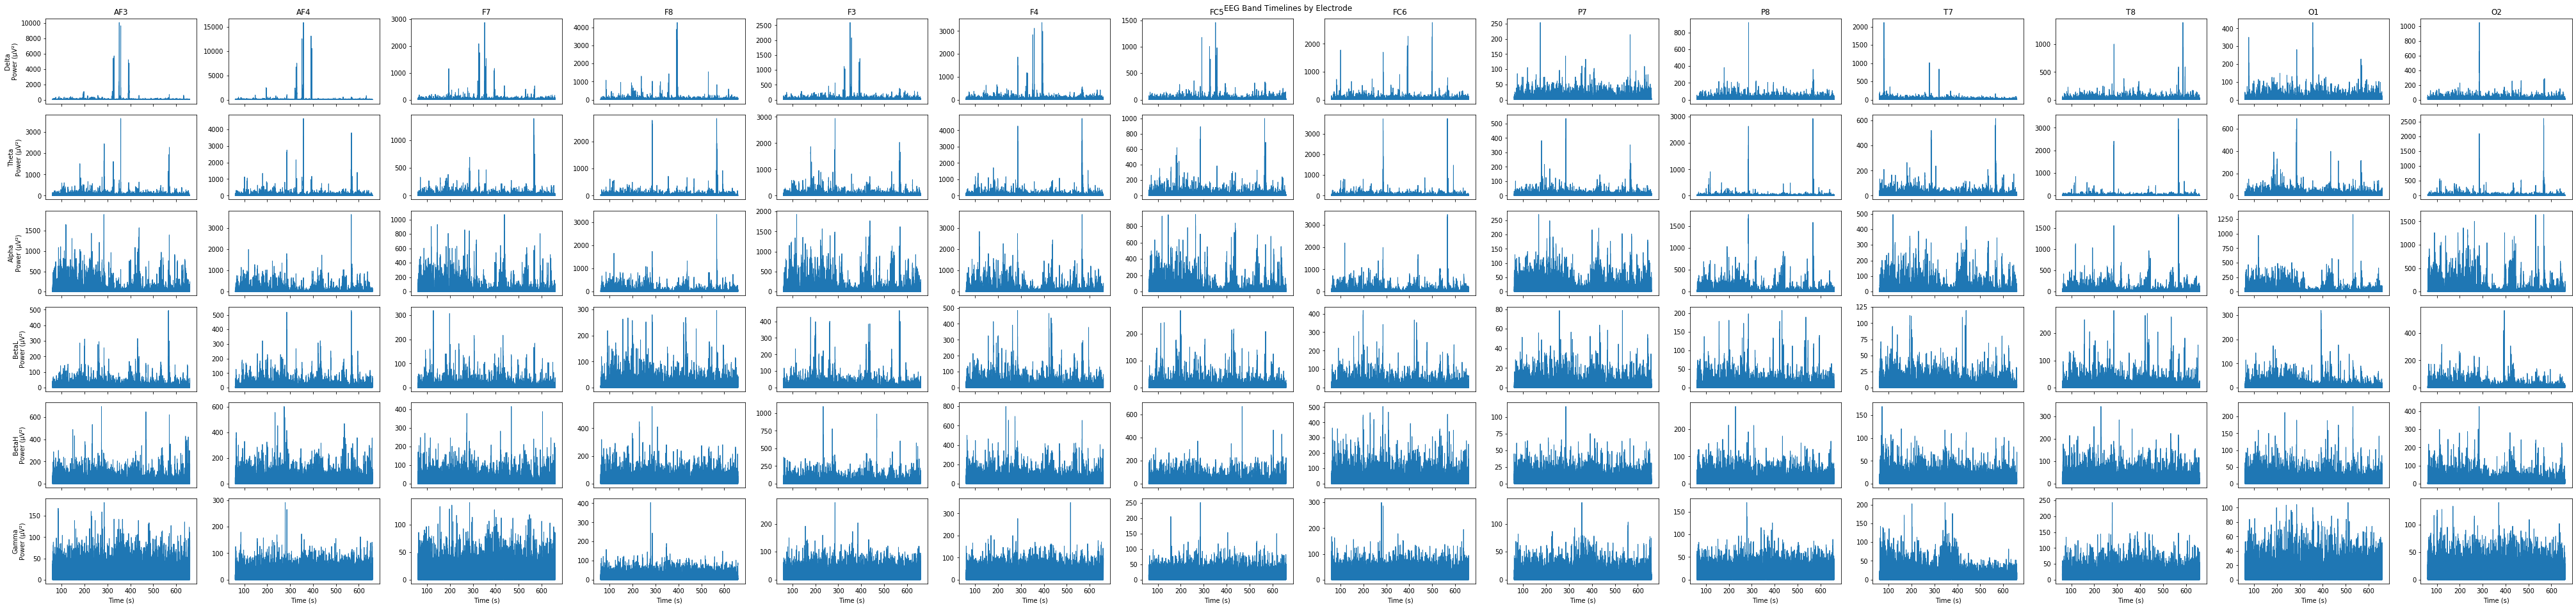

In [9]:
utilities.plot_eeg_timeline_grid(
    df=RECORDS,
    electrodes=ELECTRODES,
    ranges=RANGES,
    start_time=60,
    end_time=660
)

# Source-space + Directed Connectivity (F4/DLPFC → sensory)

In [10]:
windows = [(160,200)]

# SOURCE space (main analysis)
df_sensor = directed_connectivity.run_topdown_ignition_pipeline(
    records=RECORDS, electrodes=ELECTRODES, fs=FS,
    raw=None, windows=windows, mode='sensor'
)
print(df_sensor.head())

Creating RawArray with float64 data, n_channels=14, n_times=88855
    Range : 0 ... 88854 =      0.000 ...   694.172 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
       window    pair   band  dpli  granger_F     granger_p
0  (160, 200)  F4->O1  theta   NaN  11.983381  7.419664e-21
1  (160, 200)  F4->O1  alpha   NaN  12.137291  3.644322e-21
2  (160, 200)  F4->O1   beta   NaN  11.817818  1.593220e-20
3  (160, 200)  F4->O2  theta   NaN   5.454448  4.051633e-08
4  (160, 200)  F4->O2  alpha   NaN   5.924370  5.373500e-09


# Ignition vs Rebound Power Plots

In [11]:
# Single map
ignition_rebound.plot_topomap_from_power(RECORDS, band='rel_Alpha', montage='standard_1020')

# Grid of maps (auto-picks rel bands if present)
plot_topomap_grid_from_power(RECORDS, bands=['rel_Delta','rel_Theta','rel_Alpha','rel_BetaL','rel_BetaH','rel_Gamma'],
                             montage='standard_1005', cols=6, normalize=True)

ValueError: df must include an 'electrode' column

# Cross Frequency - PAC, Bicoherence, & Waveform Shape

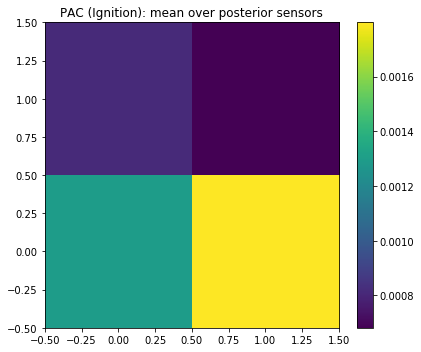

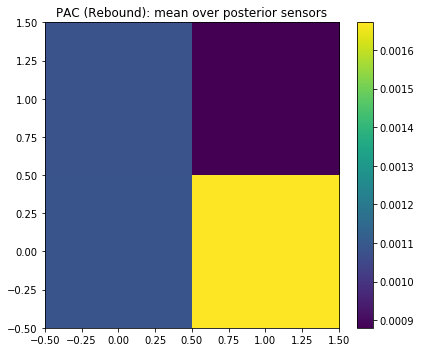

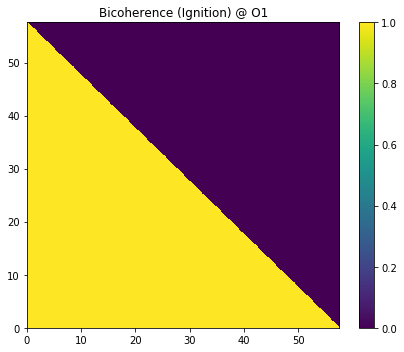

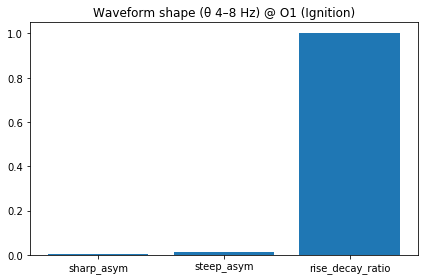

θ→γ PAC mean = 0.002; Bicoherence 95th pct = 1.000; Shape: sharp=0.003, steep=0.011, rise/decay=1.000


In [12]:
windows_ign = [(12.0, 17.0), (33.0, 38.0)]
windows_reb = [(18.0, 23.0), (39.0, 44.0)]
res = cross_frequency.run_crossfreq_suite_records(
    RECORDS,
    ignition_windows=windows_ign,
    rebound_windows=windows_reb,
    sensor_phase_ch='F4',
    sensor_amp_chs=('O1','O2','P7','P8','T7','T8'),
    phase_bands=[(4,8),(8,13)],
    amp_bands=[(13,30),(30,80)],   # auto-sanitized if too high for fs
    method='mi',
    n_sur=0
)
print(res['verdict_notes'])

# State Space Manifold Embedding

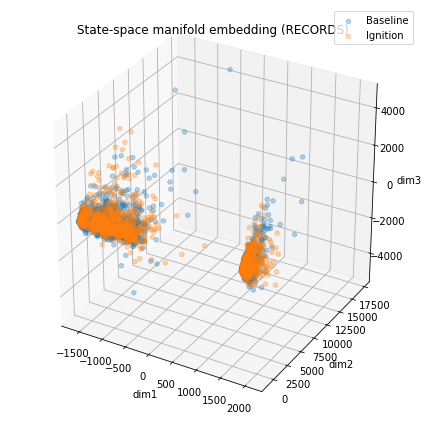

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 5.259172617420115
Ignition mincut mean: 0.0
Baseline entropy: 5.088045031773989
Baseline mincut: 0.0
Ignition eigvals avg: [-4.5640759111762655e-15, 1.437854602520896e-14, 1.6873909989148428e-14, 0.042751647865686575, 0.8670869417766701, 21.589597827032833, 22.54010912894569, 23.30039975849062, 23.43259201439954, 23.940008771530938]
Baseline eigvals: [2.0902938324043924e-15, 4.482464922236276e-15, 1.217925943966725e-14, 0.004249843103608687, 0.047337824246037274, 4.693649216602792, 5.095090967590627, 5.4122244305295, 5.416101190312096, 5.453561511986234]
Ignition embedding: (2562, 3)
Baseline embedding: (5000, 3)


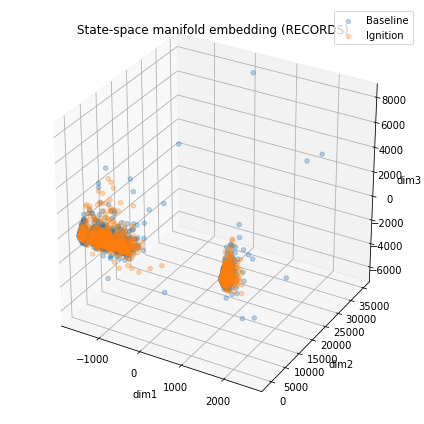

In [13]:
out = network_geometry.run_full_session_with_bands_and_exports(
    RECORDS,
    ignition_windows=[(180, 200)],
#     rebound_windows=[(14.0, 18.0)],
    electrodes=None,
    embed_method='umap',
    export_dir='session_exports',
    base_name='demo',
)

network_geometry.animate_embedding_over_time_records(
    RECORDS,
    window_sec=2.0,
    step_sec=0.5,           # smaller step → many frames
    make_gif=True,
    out_dir="embedding_frames",
    gif_name="demo.gif",
    gif_duration_s=0.12     # ~8 fps
)

# Multi-Band Geometry


=== Multi-band Geometry Summary ===
    band  f_low  f_high  ign_entropy_mean  ign_mincut_mean  base_entropy  \
0  delta    1.0     4.0          2.509358         1.773901      2.438945   
1  theta    4.0     8.0          2.524715         1.101508      2.500334   
2  alpha    8.0    13.0          2.499291         1.626528      2.529305   
3   beta   13.0    30.0          2.533472         0.635391      2.514059   
4  gamma   30.0    45.0          2.502583         0.481268      2.543398   

   base_mincut  
0     0.586782  
1     0.436370  
2     1.908000  
3     0.383051  
4     0.544550  


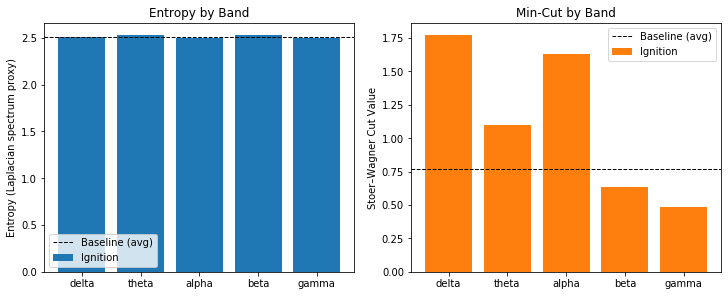

Saved multi-band summary to multi_band_summary.csv


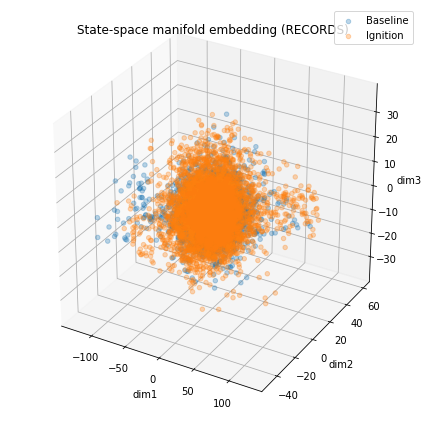

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 0.5470262407723739
Ignition mincut mean: 0.31571129272464993
Baseline entropy: 0.5930110082653832
Baseline mincut: 0.3797938921372547
Rebound entropy mean: 0.5975825261350951
Rebound mincut mean: 0.5407258939750608
Ignition eigvals avg: [-3.940532795898566e-16, 0.46514710544062515, 1.5015462024506134]
Baseline eigvals: [1.7783252151621384e-16, 0.46463642040965536, 1.1944173784943801]
Ignition embedding: (5000, 3)
Baseline embedding: (3842, 3)


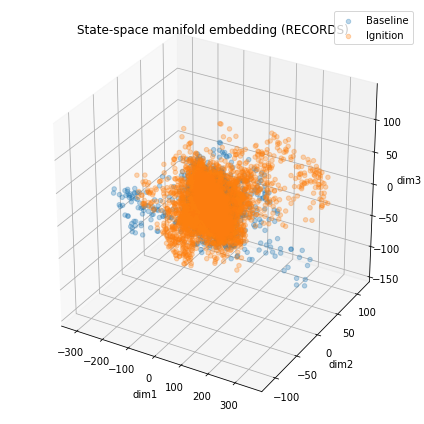

===== EEG Session Report (RECORDS) =====
Ignition entropy mean: 2.499291116357922
Ignition mincut mean: 1.6265282169257609
Baseline entropy: 2.5293045607123306
Baseline mincut: 1.9080004384027127
Rebound entropy mean: 2.5020435713481937
Rebound mincut mean: 2.0391952241181386
Ignition eigvals avg: [2.8171909249863347e-15, 1.5798026527221811, 2.0924786874802384, 2.723365573502687, 3.4245951028041723, 3.6811395040289487, 3.808392388038569, 4.014044858934263, 4.160407072525604, 4.5321192831992345]
Baseline eigvals: [7.763040020926718e-16, 1.8709181773194403, 2.2071282841744924, 2.9894046098464275, 3.3432200745450817, 3.3940584580496607, 3.423185422088089, 3.4771137011718456, 3.5093448596668364, 3.7042496711892547]
Ignition embedding: (5000, 3)
Baseline embedding: (3842, 3)


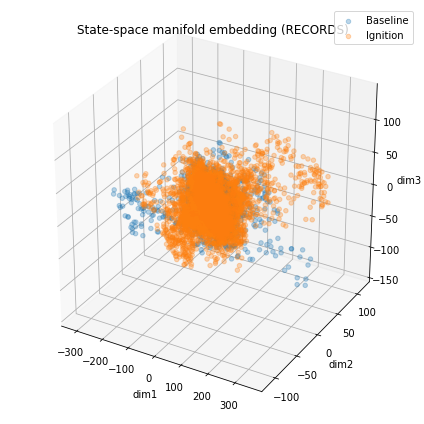

Exports: {'report_csv': 'session_exports/session_mb_report.csv', 'report_json': 'session_exports/session_mb_report.json', 'bands_csv': 'session_exports/session_mb_bands.csv', 'embedding_png': 'session_exports/session_mb_embedding.png'}


In [14]:
# --- Multi-Band Analysis: Ready-to-Run (fs=128 enforced via infer_fs_from_records) ---

# 0) Prereqs: ensure your RECORDS DataFrame exists with columns like
#    ['Timestamp', 'EEG.F4', 'EEG.O1', 'EEG.O2', ...]
#    and the fs=128 override is already in scope via your pipeline code.

# 1) Define your analysis windows (in seconds) — tweak to your session
IGNITION_WINDOWS = [(180.0, 220)]      # example: 2:00–2:30
REBOUND_WINDOWS  = [(300.0, 330.0)]      # example: 5:00–5:30

# 2) (Optional) Specify electrodes, else the code will auto-discover EEG.* columns
# ELECTRODES = ['F4', 'O1', 'O2']

# 3) Run multi-band network geometry across canonical bands
#    Produces a tidy DataFrame with per-band metrics (entropy/min-cut + baselines)
mb_df = network_geometry.run_multi_band_geometry_records(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
#     rebound_windows=REBOUND_WINDOWS,
    electrodes=ELECTRODES,
)

print("\n=== Multi-band Geometry Summary ===")
print(mb_df)

# 4) Compare ignition vs baseline by band in a quick plot (optional)
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
axs[0].bar(mb_df['band'], mb_df['ign_entropy_mean'], label='Ignition')
axs[0].axhline(y=mb_df['base_entropy'].mean(), color='k', linestyle='--', lw=1, label='Baseline (avg)')
axs[0].set_title('Entropy by Band')
axs[0].set_ylabel('Entropy (Laplacian spectrum proxy)')
axs[0].legend()

axs[1].bar(mb_df['band'], mb_df['ign_mincut_mean'], label='Ignition', color='tab:orange')
axs[1].axhline(y=mb_df['base_mincut'].mean(), color='k', linestyle='--', lw=1, label='Baseline (avg)')
axs[1].set_title('Min-Cut by Band')
axs[1].set_ylabel('Stoer–Wagner Cut Value')
axs[1].legend()
plt.show()

# 5) Save the table for your records
mb_csv_path = 'multi_band_summary.csv'
mb_df.to_csv(mb_csv_path, index=False)
print(f"Saved multi-band summary to {mb_csv_path}")

# 6) (Optional) Drill into a single band with full session report for context — e.g., alpha (8–13 Hz)
alpha_report = network_geometry.session_report_records(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    fband=(8, 13),
    electrodes=["EEG.F4",'EEG.O2', "EEG.O1"],
    embed_method='umap',
)

# 7) (Optional) End-to-end export including multi-band CSV + embedding PNG
full = network_geometry.run_full_session_with_bands_and_exports(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    electrodes=ELECTRODES,
    embed_method='umap',
    export_dir='session_exports',
    base_name='session_mb',
)
print("Exports:", {k: v for k, v in full.items() if isinstance(v, str)})

# Schumann Spike Detector — Morlet Wavelet

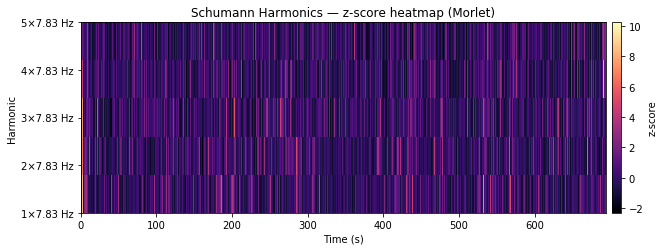

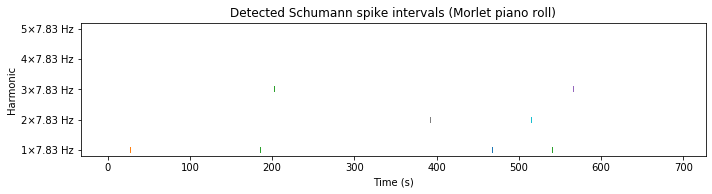

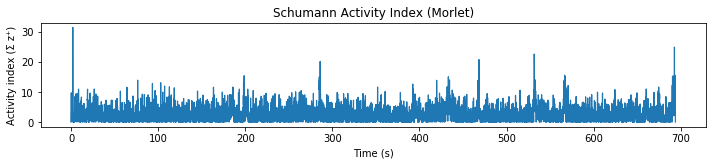

In [15]:
out = harmonics.detect_and_plot_schumann_wavelet(
    RECORDS,
    signal_col='EEG.O1',     # or your magnetometer channel
    time_col='Timestamp',
    f0=7.83,
    n_harmonics=5,
    w=6.0,                   # ↑ w → sharper frequency, broader time
    kernel_dur_sec=2.0,      # adjust if you want shorter/longer support
    baseline_win_sec=120.0,
    smooth_sec=0.20,
    z_thresh=3.5,
    min_dur_sec=0.25,
    show=True,
)

# Schumann Micro-grid + Heatmap Ridge Overlay 

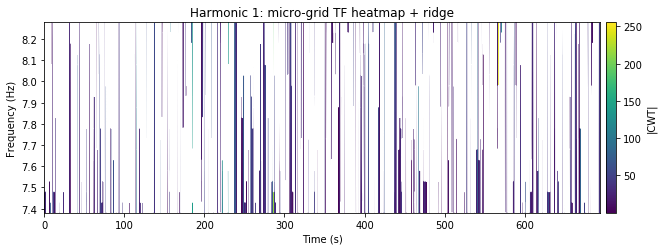

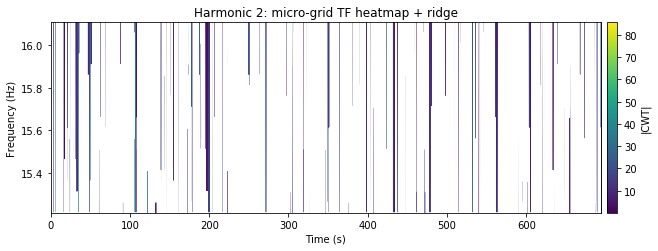

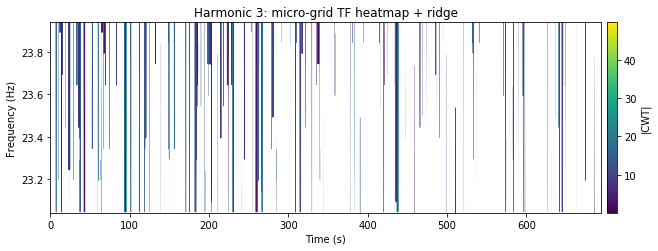

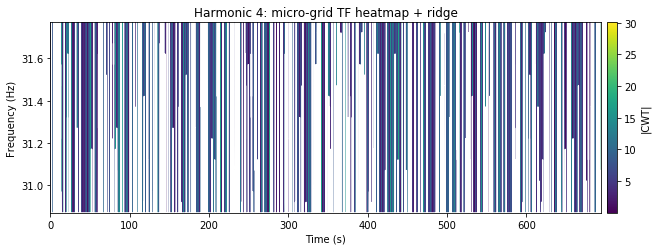

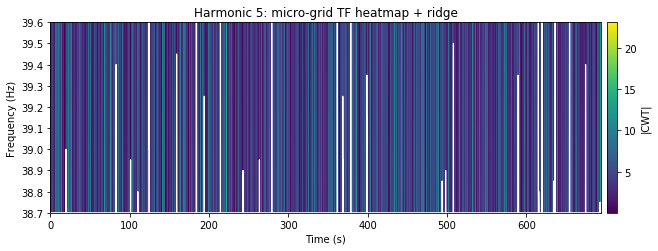

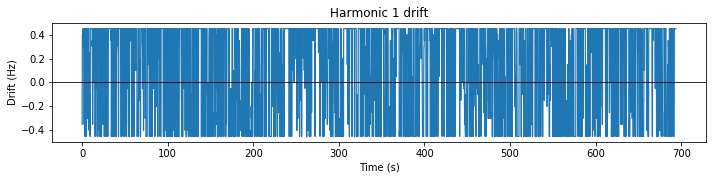

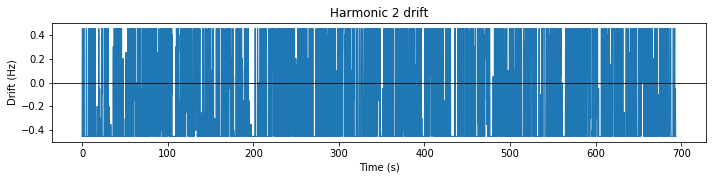

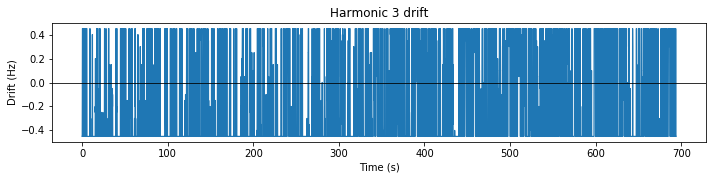

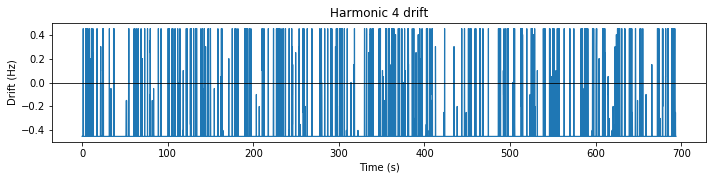

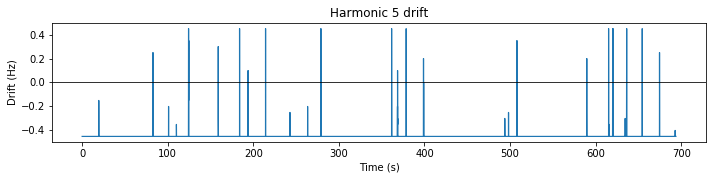

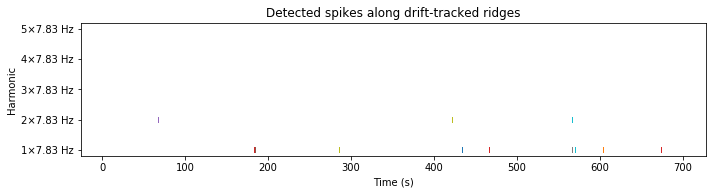

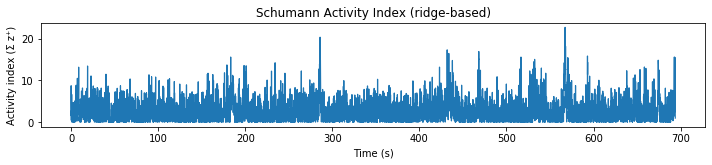

In [16]:
fused = harmonics.detect_and_plot_schumann_microgrid_with_heatmaps(
    RECORDS,
    signal_col='EEG.F4',      # or your magnetometer channel
    time_col='Timestamp',
    f0=7.83, n_harmonics=5,
    delta_hz=0.45, step_hz=0.05,
    w=6.0, kernel_dur_sec=2.0,
    baseline_win_sec=120.0, smooth_sec=0.20,
    z_thresh=3.5, min_dur_sec=0.25,
    ridge_medfilt_sec=0.5,
    show=True
)

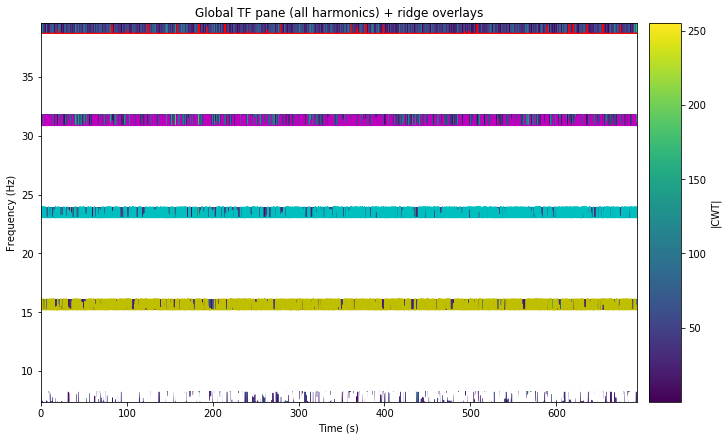

{'index': array([0.00000000e+00, 7.70401955e-03, 1.57079697e-02, ...,
        6.93767973e+02, 6.93775880e+02, 6.93783687e+02]),
 'ridge_hz': array([[ 7.48,  7.53,  7.58, ...,  8.28,  8.28,  8.28],
        [15.21, 15.21, 15.21, ..., 15.21, 15.21, 15.21],
        [23.04, 23.04, 23.04, ..., 23.04, 23.04, 23.04],
        [30.87, 30.87, 30.87, ..., 30.87, 30.87, 30.87],
        [38.7 , 38.7 , 38.7 , ..., 38.7 , 38.7 , 38.7 ]]),
 'ridge_amp': array([[26.34096709, 30.88931985, 35.42799454, ..., 19.74073316,
         17.60479793, 15.38080101],
        [10.10819868, 11.84398083, 13.56139145, ..., 22.06183253,
         19.9435548 , 17.63341158],
        [ 4.62426916,  5.34609116,  6.0953773 , ...,  9.79854199,
          9.30049959,  8.60222432],
        [ 5.68296233,  6.28343533,  6.80714166, ...,  6.20760834,
          5.53067042,  4.8317011 ],
        [ 5.27734999,  5.98622063,  6.64395329, ...,  2.64172751,
          2.29541089,  1.9671629 ]]),
 'z_ridge': array([[-0.41066528, -0.14612318,  0

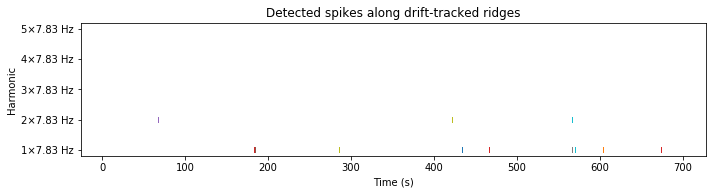

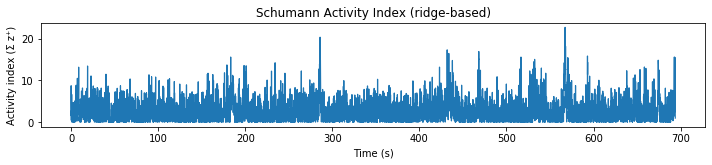

In [17]:
harmonics.detect_and_plot_schumann_microgrid_with_global_tf(
    RECORDS,
    "EEG.F4",
    time_col = 'Timestamp',
    f0=7.83,
    n_harmonics= 5,
    delta_hz=0.45,
    step_hz=0.05,
    w = 6.0,
    kernel_dur_sec = 2.0,
    baseline_win_sec  = 120.0,
    smooth_sec  = 0.20,
    z_thresh = 3.5,
    min_dur_sec  = 0.25,
    ridge_medfilt_sec  = 0.5,
    show  = True,
)

# Harmonic Overlap

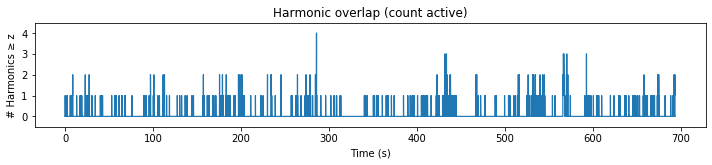

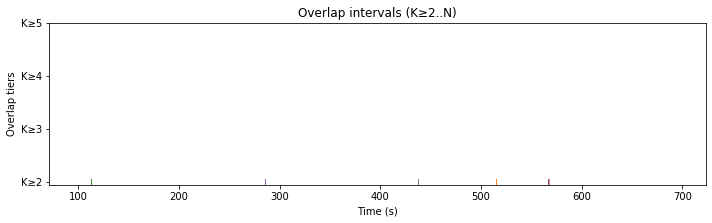

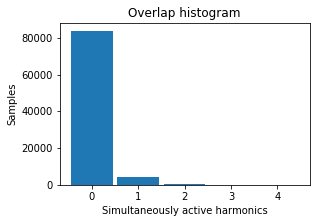

In [18]:
# after you run detect_and_plot_schumann_microgrid_with_global_tf(...)
ov = harmonics.compute_and_plot_overlap_from_fused(
    fused,               # dict returned from the detector
    z_thresh=None,       # uses fused['params']['z_thresh'] by default
    min_len_sec=0.1,    # min duration for overlap intervals
    show=True
)

# Entanglement Geometry

In [26]:
# Define your windows/electrodes/bands (or keep defaults)
IGNITION_WINDOWS = [(120.0, 150.0)]
REBOUND_WINDOWS  = [(300.0, 330.0)]
ELECTRODES = ['F4','O1','O2']

summary = entanglement_geometry.run_entanglement_geometry_minCut_PLV(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    electrodes=ELECTRODES,
    bands={'theta':(4,8), 'alpha':(8,13), 'beta':(13,30)},
    do_control=True   # set to False to skip surrogates
)

print(summary['delta_table'])

TypeError: run_entanglement_geometry_minCut_PLV() got an unexpected keyword argument 'ignition_windows'

# PAC Multiplexing (Theta/Alpha → Gamma) vs Schumann SAI/Overlap 

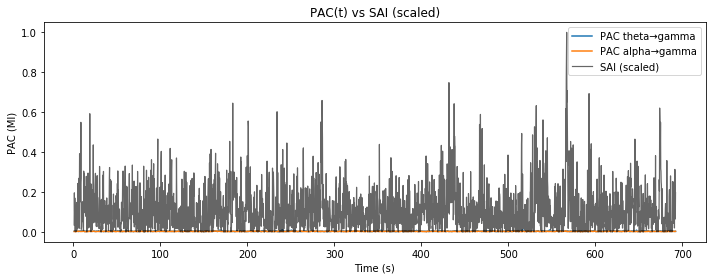

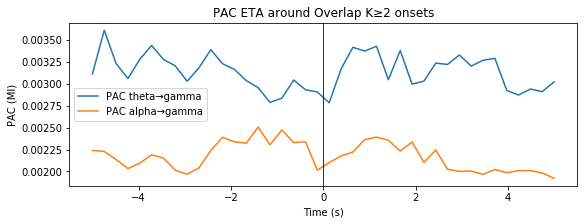

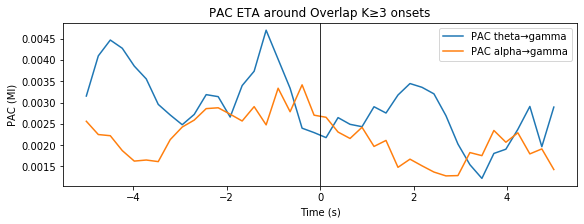

          pair  r(PAC,SAI)  r(PAC,Overlap)
0  theta→gamma   -0.064072       -0.058680
1  alpha→gamma   -0.039580       -0.002831
          pair  r_surr(PAC,SAI)  r_surr(PAC,Overlap)
0  theta→gamma        -0.040810            -0.025706
1  alpha→gamma         0.009267             0.030623


In [20]:
# 1) Run your Schumann micro-grid detector (no plots needed)
fused = harmonics.detect_and_plot_schumann_microgrid_with_global_tf(
    RECORDS, signal_col='EEG.F4', time_col='Timestamp', show=False
)

# 2) PAC vs field (default pairs)
pac_res = pac_multiplexing.run_pac_vs_schumann(
    RECORDS,
    fused=fused,
    electrodes=['F4','O1','O2'],   # or omit to autodiscover EEG.* columns
    time_col='Timestamp',
    pac_pairs={
        'theta→gamma': ((4,8),(30,80)),
        'alpha→gamma': ((8,13),(30,80)),
    },
    pac_win_sec=2.0, pac_step_sec=0.25,
    smooth_sec=0.20,
    do_surrogate=True, n_surr=200,
)

# 3) Plots + correlations
pac_multiplexing.plot_pac_timeseries(pac_res['t'], pac_res['pac_ts'], pac_res['sai'])
pac_multiplexing.plot_pac_overlap_etas(pac_res['t'], pac_res['pac_ts'], pac_res['overlap'], k_tiers=[2,3])
print(pac_res['corr_table'])
print(pac_res['surrogate_corrs'])  # optional control table

# Ridge–PAC Coupling (Field–Brain Synchrony)

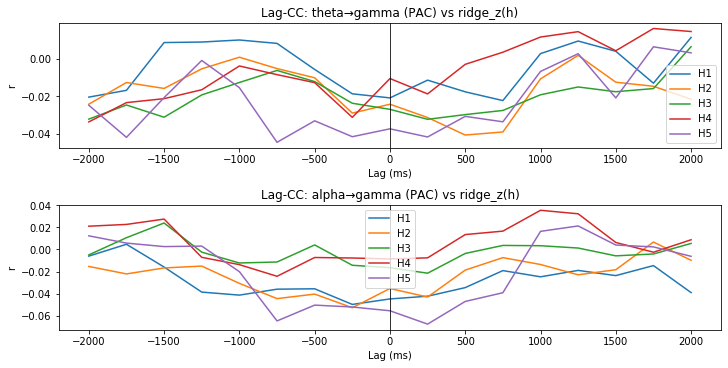

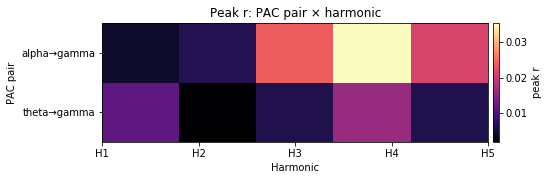

          pair  harmonic    peak_r  peak_lag_ms
0  theta→gamma         1  0.011397       2000.0
1  theta→gamma         2  0.001855       1250.0
2  theta→gamma         3  0.006463       2000.0
3  theta→gamma         4  0.016140       1750.0
4  theta→gamma         5  0.006397       1750.0


In [21]:
fused = harmonics.detect_and_plot_schumann_microgrid_with_global_tf(
    RECORDS, signal_col='EEG.F4', time_col='Timestamp', show=False
)

res = pac_multiplexing.run_ridge_pac_coupling(
    RECORDS,
    fused=fused,
    electrodes=['F4','O1','O2'],
    time_col='Timestamp',
    pac_pairs={'theta→gamma':((7,9),(30,80)), 'alpha→gamma':((8,12),(30,80))},
    max_lag_sec=2.0,          # scan ±2 s
    step_sec=0.25,            # PAC sampling step
    pac_win_sec=2.0,
    smooth_sec=0.20,
    off_resonant_bands=[(16,18)],  # placeholder control
    show=True
)

print(res['ridge_pac_corr'].head())

# Criticality Signatures — 1/f, DFA, Avalanches vs Conscious Mode

     d_beta  d_alpha
0  0.071189  0.09033


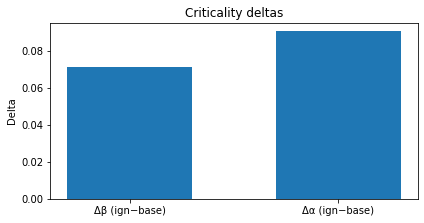

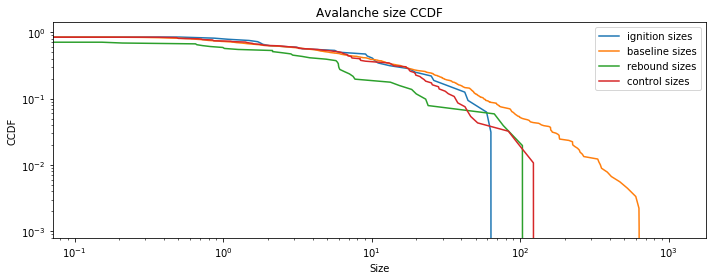

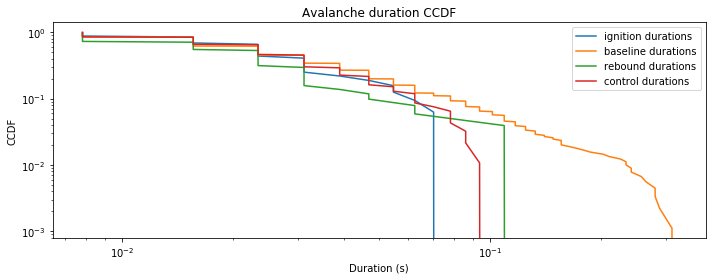

tau(size): ign = nan±nan, base = 1.62±0.03


In [22]:
# 1) Define your windows and channels
IGNITION_WINDOWS = [(180, 200)]         # example
# REBOUND_WINDOWS  = [(300.0, 330.0)]         # optional
CONTROL_WINDOWS  = [(60,120)]           # deep rest / low arousal segment (optional)
ELECTRODES = ['F4','O1','O2']               # or omit to auto-discover EEG.* columns

# 2) Run the analysis
crit = criticality.run_criticality_analysis(
    RECORDS,
    ignition_windows=IGNITION_WINDOWS,
    rebound_windows=REBOUND_WINDOWS,
    control_windows=CONTROL_WINDOWS,        # optional
    electrodes=ELECTRODES,
    bands={'theta':(4,8), 'alpha':(8,13)},  # used for envelope & context
    dfa_scales_sec=np.geomspace(0.25, 8.0, 14),
    avalanche_band=(4,40),
    avalanche_thresh='p95',                  # or a numeric threshold
)

# 3) Inspect deltas (ignition – baseline)
print(crit['delta_table'])                   # columns: d_beta (↓ is flatter), d_alpha (→1 is more critical)

# 4) Quick plots
criticality.plot_criticality_deltas(crit['delta_table'])
criticality.plot_avalanche_ccdf(crit['avalanches'])      # log–log CCDFs by state

tau_ign, se_ign = criticality.fit_powerlaw_tail(crit['avalanches']['ignition']['sizes'])
tau_base, se_base = criticality.fit_powerlaw_tail(crit['avalanches']['baseline']['sizes'])
print('tau(size): ign = %.2f±%.2f, base = %.2f±%.2f' % (tau_ign, se_ign, tau_base, se_base))
# Compare to ~1.5 expected under SOC (i.e., CCDF slope ~ -0.5, PDF slope ~ -1.5)

# Connectome Harmonics Engagement Breadth

        d_H      d_PR   d_Top10
0 -0.000035 -0.000008  0.000004


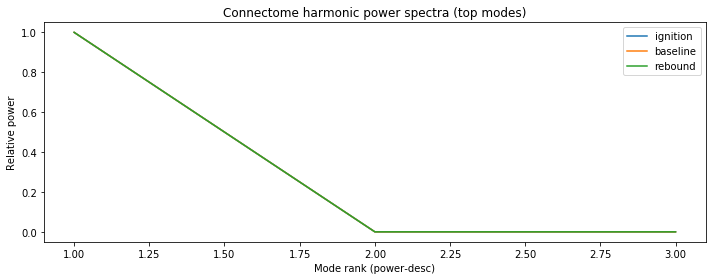

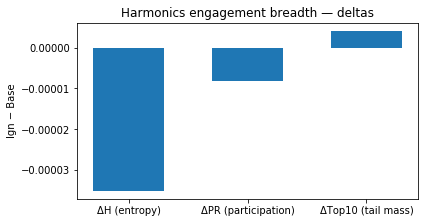

In [23]:
# 1) Electrode order you will use in the breadth analysis:
ELECTRODES = ELECTRODES  # <- put your exact list here

# 2) Build functional harmonics from baseline (complement of ignition windows)
H = connectome_harmonics.build_functional_harmonics_from_baseline(
    RECORDS,
    electrodes=ELECTRODES,
    ignition_windows=[(290,310),(580,600)],  # your ignition windows
    time_col='Timestamp',
    fband=(4,40),                  # band for wPLI
    n_modes=64                     # number of spatial modes to keep
)
np.save('harmonics_sensor_space.npy', H)     # optional: save for reuse

# 3) Run connectome-harmonics breadth using H you just built
res = connectome_harmonics.run_connectome_harmonics_breadth(
    RECORDS,
    H=H,
    electrodes=ELECTRODES,
    ignition_windows=[(290,310),(580,600)],
    rebound_windows=[(310,325)],
    time_col='Timestamp',
    orthonormal=True,
    do_surrogate=True, n_surr=200
)
print(res['delta_table'])
connectome_harmonics.plot_harmonics_power_spectra(res['spectra'])
connectome_harmonics.plot_harmonics_breadth_deltas(res['delta_table'])


In [24]:
# order you’ll use in the breadth analysis (must match H rows)
H = connectome_harmonics.build_functional_harmonics_from_baseline(
    RECORDS,
    electrodes=ELECTRODES,
    ignition_windows=[(120,150)],
    time_col='Timestamp',
    fband=(4,40),
    n_modes=64
)
np.save('harmonics_sensor_space.npy', H)

# Then run the breadth analysis with the generated H
res = connectome_harmonics.run_connectome_harmonics_breadth(
    RECORDS,
    H=H,
    electrodes=ELECTRODES,
    ignition_windows=[(120,150)],
    rebound_windows=[(300,330)],
    time_col='Timestamp',
    orthonormal=True,
    do_surrogate=True, n_surr=200
)
print(res['delta_table'])

        d_H      d_PR   d_Top10
0 -0.000016 -0.000004  0.000002


# Schumann Overlap → Field Coherence ETAs

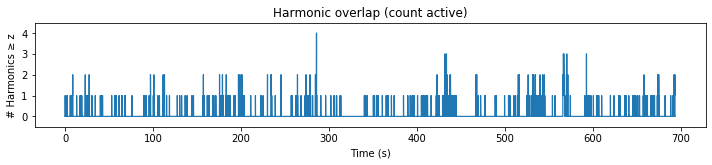

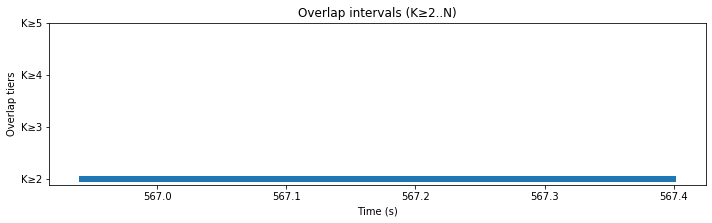

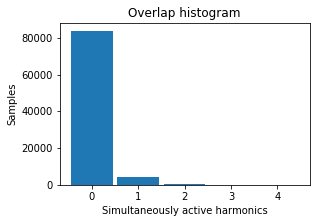

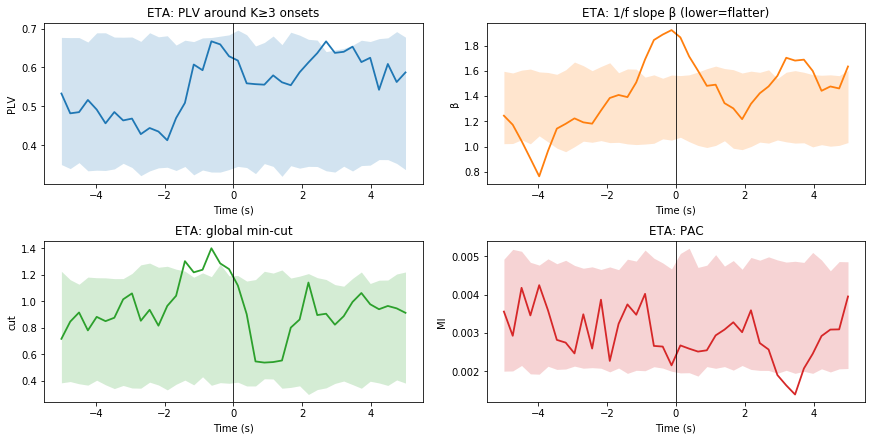

3 K≥3 onsets detected
[-5.         -4.74358974 -4.48717949 -4.23076923 -3.97435897 -3.71794872
 -3.46153846 -3.20512821 -2.94871795 -2.69230769 -2.43589744 -2.17948718
 -1.92307692 -1.66666667 -1.41025641 -1.15384615 -0.8974359  -0.64102564
 -0.38461538 -0.12820513  0.12820513  0.38461538  0.64102564  0.8974359
  1.15384615  1.41025641  1.66666667  1.92307692  2.17948718  2.43589744
  2.69230769  2.94871795  3.20512821  3.46153846  3.71794872  3.97435897
  4.23076923  4.48717949  4.74358974  5.        ]
(40,)
(40,)
(40,)
{'theta→gamma': (40,)}


In [30]:
# 1) Fused Schumann micro-grid (no plots needed)
fused = harmonics.detect_and_plot_schumann_microgrid_with_global_tf(
    RECORDS, signal_col='EEG.F4', time_col='Timestamp', show=False
)

out = harmonics.compute_and_plot_overlap_from_fused(
    fused,
    z_thresh=None,       # falls back to fused_dict['params']['z_thresh']
    min_len_sec=0.25,    # min overlap interval duration
    show=True
)

# # 2) Event-triggered averages around K≥3 onsets
etas = harmonics.run_overlap_coherence_etas(
    RECORDS,
    fused=fused,
    electrodes=ELECTRODES,      # or omit to autodetect EEG.* columns
    time_col='Timestamp',
    K=3,
    win_sec=2.0, step_sec=0.25,
    span_sec=5.0,                     # ±5 s window
    plv_band=(8,13),
    pac_pairs={'theta→gamma':((4,8),(30,80))},
    mincut_band=(8,13),
    beta_band=(1,40),
    n_boot=200,
    show=True
)

print(etas['n_onsets'], "K≥3 onsets detected")
print(etas['eta_time'])                # ETA time axis (s)
print(etas['eta_plv'].shape)          # (T,)
print(etas['eta_beta'].shape)         # (T,)
print(etas['eta_mincut'].shape)       # (T,)
print({k: v.shape for k,v in etas['eta_pac'].items()})

# Directional Coupling — dPLI/Granger Right‑DLPFC → Sensory

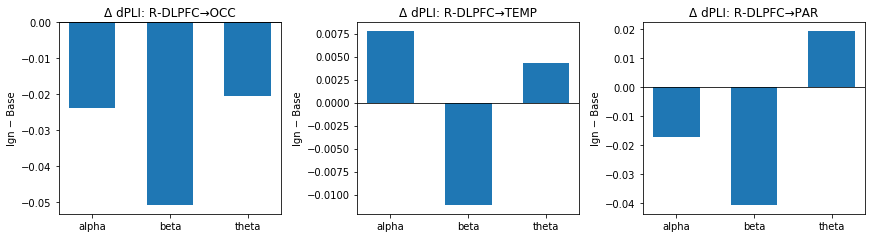

In [31]:
clusters = {
    'R_DLPFC': ['F4','F8','FC6','AF4'],
    'OCC':     ['O1','O2'],
    'TEMP':    ['T7','T8'],
    'PAR':     ['P7','P8'],
}

res = directional_coupling.run_directional_coupling_rdlfpc_sensory(
    RECORDS,
    ignition_windows=[(180,200)],
    # rebound_windows=[(300,330)],
    time_col='Timestamp',
    bands={'theta':(4,8), 'alpha':(8,13), 'beta':(13,30)},
    clusters=clusters,                     # use defaults (see below) or pass your own
    do_granger=True,                   # will auto‑disable if statsmodels is missing
    control_windows=None,              # e.g., deep rest
    do_shuffle_control=True,           # random sample control windows of equal length
    n_shuffle=200,
)

directional_coupling.plot_directional_deltas(res['delta_table'])

# RT-Style Multi-Seed Surfaces — Multiway Cuts Across Subsystems

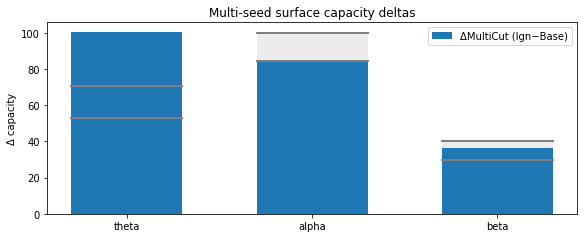

    band     cap_ign   cap_base     cap_reb       d_cap
0  theta  160.293573  59.559784  192.862727  100.733789
1  alpha  180.368968  96.606167  209.415059   83.762802
2   beta   63.717983  27.548239   97.614105   36.169744


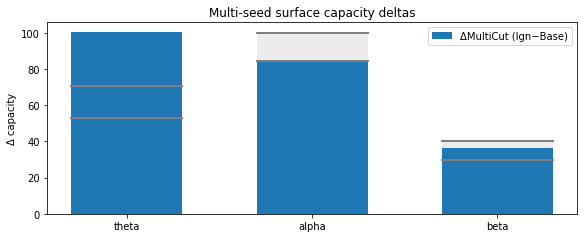

In [32]:
clusters = {
    'R_DLPFC': ['F4','F8','FC6','AF4'],
    'OCC':     ['O1','O2'],
    'TEMP':    ['T7','T8'],
    'PAR':     ['P7','P8'],
}

res = surface_cuts.run_multi_seed_surface_cuts(
    RECORDS,
    ignition_windows=[(290,310),(580,600)],
    rebound_windows=[(310,325)],          # optional
    time_col='Timestamp',
    bands={'theta':(4,8),'alpha':(8,13),'beta':(13,30)},
    electrodes=None,                      # autodetect EEG.* or pass an ordered list
    clusters=clusters,                        # use defaults (F,P,O,T) or pass your own dict
    control_mode='degree_rewire',         # or 'weight_permute'
    n_shuffle=200,
    graph_density=0.3,                    # for rewiring control (top-edge density)
    show=True
)

print(res['delta_table'])                 # columns: band, cap_ign, cap_base, cap_reb, d_cap
surface_cuts.plot_multicut_deltas(res['delta_table'], res.get('shuffle_null'))

# Phase Metric Embedding → Emergent Geometry

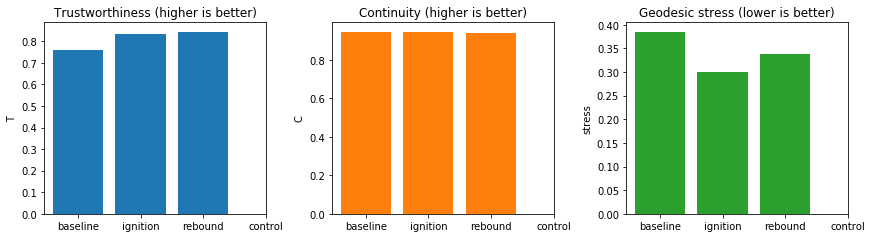

Ignition surrogate 95% bands:
  Trust:  [0.603, 0.649]
  Cont.:  [0.790, 0.816]
  Stress: [0.520, 0.548]


In [33]:
res = emergent_geometry.run_phase_embedding_emergent_geometry(
    RECORDS,
    ignition_windows=[(290,310),(580,600)],
    rebound_windows=[(310,325)],
    time_col='Timestamp',
    band=(8,13),
    n_neighbors=6, n_components=2,
    method='isomap',
    k_quality=5,
    n_surr=100,
    show=True
)

# Temporal Holography — Multiplexed References

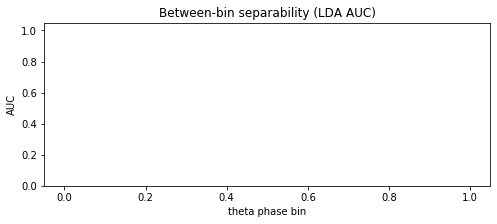

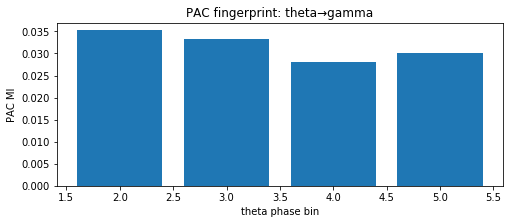

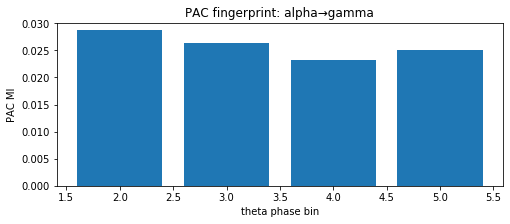

In [34]:
# 1) Build the fused Schumann reference (no plot needed)
fused = harmonics.detect_and_plot_schumann_microgrid_with_global_tf(
    RECORDS, signal_col="EEG.F4", time_col='Timestamp', show=False
)

# 2) Make the overlap series and grab K≥3 onsets
import numpy as np
z_thr = float(fused.get('params',{}).get('z_thresh', 3.5))
overlap = np.sum((np.asarray(fused['z_ridge']) >= z_thr).astype(int), axis=0)
t_field = np.asarray(fused['index'])
# rising edges where overlap crosses from <3 to ≥3
on_idx = np.where(np.diff((overlap >= 3).astype(int)) == 1)[0] + 1
# (optional) enforce a minimum spacing between onsets (e.g., 2 s) to avoid dense bursts
min_isi = 2.0  # seconds
filtered = []
last_t = -np.inf
for i in on_idx:
    if t_field[i] - last_t >= min_isi:
        filtered.append(i)
        last_t = t_field[i]
ONSETS = t_field[filtered].tolist()
LABELS = None

# 3) Run temporal holography using these auto onsets
res = temporal_holography.run_temporal_holography_multiplexed(
    RECORDS,
    event_onsets=ONSETS,
    labels=LABELS,                 # omit or supply if you have trial content labels
    time_col='Timestamp',
    electrodes=None,
    ref_electrodes=['O1','O2'],    # or Oz/Pz if present
    ref_band='theta',              # 'alpha' also supported
    n_bins=6,
    feat_window=(-0.5, 1.0),
    show=True
)

# Toroidal Phase–Torus Analysis

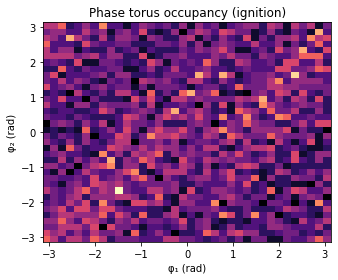

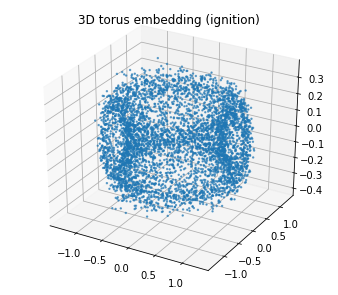

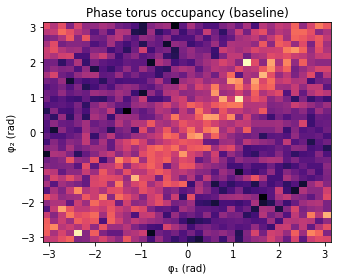

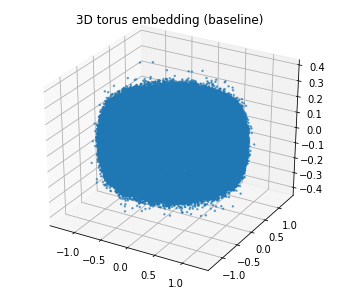

       d_H2     d_rho      d_ID      d_R1      d_R2
0 -0.016307 -0.031704  0.021316  0.004933  0.002341


In [35]:
res = toroidal_phase.run_toroidal_phase_analysis(
    RECORDS,
    time_col='Timestamp',
    ignition_windows=[(290,310),(580,600)],
    rebound_windows=[(310,325)],
    ref_electrodes=['O1','O2'],       # or ['O1','O2','Oz','Pz']
    band1=(4,8),                      # theta
    band2=(8,13),                     # alpha
    amp_band=(30,80),                 # gamma envelope for 3D radius (optional)
    n_bins=36, n_surr=200,
    show=True
)

print(res['delta_table'])   # ignition − baseline for H₂D, ρ, ID, R₁, R₂


# Frequency-domain coupling: Multi-taper MSC + Wavelet Coherence (WTC)

In [36]:
msc = frequency_domain_coupling.run_multitaper_msc_harmonics(
    RECORDS,
    x_channels=['EEG.AF3', 'EEG.AF4','EEG.F3', 'EEG.F7', 'EEG.F8', 'EEG.FC5','EEG.FC6','EEG.P7', 'EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2'],
    y_channel='EEG.F4',                 # or your Schumann reference channel
    windows=[(290,310),(580,600)],
    time_col='Timestamp',
    half_bw_hz=3.0
)
print(msc['harmonics_table'])

        freq       MSC        lo   hi  phase_rad    lag_ms
0   7.834820  0.978790  0.863198  1.0  -0.005853 -0.118900
1  14.293464  0.987673  0.960345  1.0  -0.001362 -0.015160
2  20.799023  0.960303  0.717043  1.0  -0.005360 -0.041012
3  27.304582  0.977092  0.879610  1.0   0.001654  0.009639
4  33.794502  0.976011  0.834964  1.0  -0.002204 -0.010379


In [ ]:
msc_ign = frequency_domain_coupling.run_multitaper_msc_harmonics(RECORDS, ['EEG.O1','EEG.O2'], 'EEG.F4',
                                       windows=[(290,310),(580,600)], time_col='Timestamp', half_bw_hz=3.0)
msc_base = frequency_domain_coupling.run_multitaper_msc_harmonics(RECORDS, ['EEG.O1','EEG.O2'], 'EEG.F4',
                                        windows=None, time_col='Timestamp', half_bw_hz=3.0)
frequency_domain_coupling.plot_msc_harmonics_compare(msc_ign, msc_base)
frequency_domain_coupling.plot_msc_harmonics_table(msc_ign['harmonics_table'], title='Ignition only', label='Ignition', color='tab:blue')


# PLV at Harmonics

In [ ]:
pd.set_option('display.max_rows', None) # Or a specific large number
# Then display your DataFrame

# 1) PLV at harmonics (with optional topography if you provide chan_pos)
plv_res = frequency_domain_coupling.run_plv_harmonics_topography(RECORDS,
            eeg_channels=['AF3', 'AF4','F3','F7', 'F8', 'FC5','FC6','P7', 'P8', 'O1','O2','T7','T8'],
            sr_channel='EEG.F4',    # or a magnetometer reference
            harmonics=[7.83,14.3,20.8,27.3,33.8],
            half_bw_hz=0.6,
            windows=[(290,310),(580,600)])
print(plv_res['table'])
# Optional topography plot for a single harmonic:
# chan_pos = {'O1':(-0.4,-0.8),'O2':(0.4,-0.8)}  # example positions
# plot_plv_topography(plv_res['table'], chan_pos, freq=7.83, title='PLV @ 7.83 Hz')

# Cross-correlogram of envelopes

In [ ]:
# 2) Cross-correlogram of envelopes (θ≈7.8 Hz)
eeg = frequency_domain_coupling.get_series(RECORDS, 'EEG.O1')
sr  = frequency_domain_coupling.get_series(RECORDS, 'EEG.F4')
boot = frequency_domain_coupling.bootstrap_peaklag_ci(eeg, sr, 128, center_hz=7.83, half_bw_hz=0.6, max_lag_sec=2.0, n_boot=500)
print('Peak lag (ms):', boot['peak_ms'], '95% CI:', boot['ci'])

# Cyclostationary spectral correlation

In [ ]:
# 3) Cyclostationary spectral correlation at harmonics
# robust to any α — no integer-bin constraint
scf = frequency_domain_coupling.scf_at_harmonics(RECORDS, 'EEG.F4',
                       harmonics=[7.83,14.3,20.8,27.3,33.8],
                       windows=[(290,310),(580,600)],
                       nperseg=4096, noverlap=2048)
print(scf['table'])


# Cross-frequency interactions w/ Schumann

## Schumann-locked ERPAC

In [ ]:
# 3a) Schumann-locked ERPAC:
det_params = {'center_hz':7.83, 'half_bw_hz':0.6, 'thresh_mode':'z', 'z_thresh':2.5}
er_params  = {'win_sec':(-10,10), 'pac_phase_band':(4,8), 'pac_amp_band':(30,80), 'step_sec':0.25, 'win_pac_sec':1.0}
er = cross_frequency.run_schumann_locked_erpac(RECORDS, sr_channel='EEG.F4',
        eeg_channels=['EEG.AF4','EEG.FC6', 'EEG.O2','EEG.T8','EEG.P8'],
        time_col='Timestamp',
        detect_params=det_params,
        erpac_params=er_params,
        baseline_window=(-10,-2),
        do_permutation=True)
print('n_onsets:', len(er['onsets']))

# Plot ERPAC mean with significant clusters if present
plt.figure(figsize=(8,3))
plt.plot(er['t_rel'], er['mean_tc'], lw=1.8, label='ERPAC (θ→γ)')
if 'perm' in er:
    m = er['perm']['sig_mask']
    plt.fill_between(er['t_rel'], 0, er['mean_tc'], where=m, color='tab:red', alpha=0.25, step='pre', label='sig cluster')
plt.axvline(0, color='k', lw=1); plt.xlabel('Time (s)'); plt.ylabel('PAC (MI)')
plt.title('Event-related PAC around Schumann bursts'); plt.legend(); plt.tight_layout(); plt.show()

## Cross-bicoherence

In [ ]:
# 3b) Cross-bicoherence:
bi = cross_frequency.cross_bicoherence(RECORDS, x_sr='EEG.F4', y_eeg='EEG.O2', z_eeg=None,
                       time_col='Timestamp', f1_list=[7.83], f2_min=35, f2_max=60, n_f2=40,
                       nperseg=2048, noverlap=1024, do_surrogate=True, n_surr=200)
cross_frequency.plot_bicoherence(bi, i_f1=0)

# Directionality & Information Flow

## VAR / PDC / DTF

In [ ]:
# 4a) VAR / PDC / DTF
res = information_flow.run_freq_granger_pdc_dtf(RECORDS,
        channels=['EEG.F4','EEG.O1','EEG.O2', 'EEG.T8'],  # include Schumann ref if available
        windows=[(290,310),(580,600)],
        time_col='Timestamp',
        order_max=2, crit='aic',
        fmin=0.0, fmax=45.0, n_freq=256,
        harmonics=[7.83,14.3,20.8,27.3,33.8],
        run_granger_tests=True)
print('VAR order:', res['order'], 'stable:', res['stable'], 'LB pvals:', res['lb_pvals'])
print(res['harmonics_table'].head())
if res['granger_tests'] is not None: print(res['granger_tests'])

## Transfer Entropy

In [ ]:
# 4b) Transfer Entropy
te = information_flow.run_transfer_entropy(RECORDS, x_channel='EEG.F4', y_channel='EEG.O1',
        windows=[(290,310),(580,600)], time_col='Timestamp',
        lags_ms=[10,20,40,80,160,320], k_embed_x=1, k_embed_y=1, k=4, n_surr=200)
print('TE X->Y:', te['TE_xy'], 'thr95:', te['thr_xy_95'])
print('TE Y->X:', te['TE_yx'], 'thr95:', te['thr_yx_95'])


## Time-varying DTF at 7.83 Hz

In [ ]:
# 4c) Time-varying DTF at 7.83 Hz
tv = information_flow.run_tvar_dtf(RECORDS, channels=['EEG.F4','EEG.O2'],
        windows=[(290,310),(580,600)], time_col='Timestamp',
        order=4, lam=0.995, f0=7.83)
print('DTF_t shape:', tv['DTF_t'].shape)

## Directionality Index

In [ ]:
# Example: j=0 → i=1 (channels[0] -> channels[1])
i, j = 1, 0
dtf_ij = tv['DTF_t'][:, i, j]
dtf_ji = tv['DTF_t'][:, j, i]
di = dtf_ij - dtf_ji

# light smoothing (e.g., 0.5 s)
win = max(1, int(round(0.5 * tv['fs'])))
w = np.ones(win)/win
dtf_ij_s = np.convolve(dtf_ij, w, mode='same')
dtf_ji_s = np.convolve(dtf_ji, w, mode='same')
di_s     = np.convolve(di,     w, mode='same')

plt.figure(figsize=(9,3))
plt.plot(dtf_ij_s, label=f"{tv['channels'][j]}→{tv['channels'][i]} @ {tv['f0']} Hz")
plt.plot(dtf_ji_s, label=f"{tv['channels'][i]}→{tv['channels'][j]}")
plt.plot(di_s,     label='Directionality index (Δ)')
plt.axhline(0, color='k', lw=0.8); plt.legend(); plt.tight_layout(); plt.show()


In [ ]:
# 1) Compute TV-DTF for ignition & baseline (same channels & params)
tv_ign = information_flow.run_tvar_dtf(RECORDS, channels=['EEG.F4','EEG.F3','EEG.AF3','EEG.AF4','EEG.FC5','EEG.FC6','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2'],
                      windows=[(290,310),(580,600)], time_col='Timestamp', order=4, lam=0.995, f0=7.83)
tv_base = information_flow.run_tvar_dtf(RECORDS, channels=tv_ign['channels'],
                       windows=[(0,290),(325,580)], time_col='Timestamp', order=4, lam=0.995, f0=7.83)

# 2) Plot the bidirectional grid styled like the single-link figure
information_flow.plot_dtf_grid_bidir_like_single(tv_ign, tv_base,
                                src_channel='EEG.F4',
                                smooth_sec=0.6,
                                n_cols=3,
                                show_baseline=False,     # set True to overlay faint baseline
                                n_perm=500,
                                session_name='session_A')


## DTF Mean Ignition

In [ ]:
def mean_in_windows(x, fs, windows):
    if not windows: return np.nan
    out=[]
    for (t0,t1) in windows:
        s,e = int(t0*fs), int(t1*fs)
        s = max(0, min(len(x)-1, s)); e = max(s+1, min(len(x), e))
        out.append(np.nanmean(x[s:e]))
    return float(np.nanmean(out)) if out else np.nan

ign_wins = [(290,310),(580,600)]
# baseline = complement of ignition (quick and dirty): everything else in the analyzed segment
# or use your own control windows
base_mean = np.nanmean(dtf_ij_s)  # replace with explicit control windows if you have them
ign_mean  = mean_in_windows(dtf_ij_s, tv['fs'], ign_wins)

print("DTF mean ignition:", ign_mean, "baseline:", base_mean, "Δ:", ign_mean - base_mean)

In [ ]:
rng = np.random.default_rng(7)
n_perm = 500
null = []
for _ in range(n_perm):
    # random circular shift of one channel's time course before TV-AR (quick proxy):
    # For a more correct null, rerun run_tvar_dtf on shifted data; this quick version
    # shifts the already-computed DTF, which is conservative for testing a mean diff.
    s = int(rng.integers(1, len(dtf_ij_s)-1))
    dtf_ij_perm = np.r_[dtf_ij_s[-s:], dtf_ij_s[:-s]]
    ign = mean_in_windows(dtf_ij_perm, tv['fs'], ign_wins)
    null.append(ign - base_mean)
thr95 = np.nanpercentile(null, 95)
print("Δ threshold (95% null):", thr95)

# Network Coupling

## Cross-domain graph alignment

In [ ]:
eeg_channels = ['EEG.AF3','EEG.AF4','EEG.F7','EEG.F8','EEG.F3','EEG.F4','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2']
sr_channel  = 'EEG.F4'   # or a magnetometer
windows = [(290,310),(580,600)]   # optional

# 5a) Cross-domain graph alignment
res = network_coupling.cross_domain_graph_alignment(RECORDS,
        eeg_channels=eeg_channels, sr_channel=sr_channel,
        band=(8,13), harmonics=[7.83,14.3,20.8,27.3,33.8],
        windows=[(290,310),(580,600)])
print(res['summary'])

## ROI Mapping

In [ ]:
# 5b) ROI mapping (sensor proxy)
# conservative ROI map (use whatever exists)
roi_map = {
  'OCC': ['O1','O2'],
  'PAR': ['P7','P8'],
  'FR':  ['AF3','AF4','F3','F4','F7','F8','FC5','FC6'],
  'TEMP':['T7','T8']
}
roi_res = network_coupling.roi_plv_msc_vs_sr(RECORDS, roi_map, sr_channel=sr_channel,
        windows=[(290,310),(580,600)], phase_band=(7.3,8.3),
        harmonics=[7.83,14.3,20.8,27.3,33.8], n_surr=200)
print(roi_res['roi_table'])

# Hidden Markov

## ERP/ERSP/ITC around Schumann bursts

In [ ]:
eeg_channels = ['EEG.AF3','EEG.AF4','EEG.F7','EEG.F8','EEG.F3','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.O1','EEG.O2']


# 6a) ERP/ERSP/ITC around Schumann bursts
er = hidden_markov.erp_ersp_itc(RECORDS,
                  eeg_channels=eeg_channels,
                  sr_channel='EEG.F4',
                  time_col='Timestamp',
                  win_sec=(-3, 3),
                  baseline_sec=(-4,-1),
                  center_hz=7.83, half_bw_hz=0.6,
                  detect_kwargs={'thresh_mode':'z','z_thresh':1.8},
                  fmin=4, fmax=40, n_freq=48, w0=6.0,
                  n_perm=200, alpha=0.05, show=True)

In [ ]:
er = hidden_markov.erp_ersp_itc_safe(
    RECORDS,
    eeg_channels=eeg_channels, #['EEG.O1','EEG.O2'],
    sr_channel='EEG.F4',
    time_col='Timestamp',
    win_sec=(-3, 3),                 # shorter window to avoid edges
    baseline_sec=(-2, -0.5),
    center_hz=7.83, half_bw_hz=0.6,
    detect_kwargs={'thresh_mode':'z','z_thresh':1.8, 'min_isi_sec':1.0},  # looser detection
    fmin=4, fmax=40, n_freq=48, w0=6.0,
    n_perm=200, alpha=0.05,
    edge_policy='pad', pad_mode='reflect',
    show=True
)

## HMM-like state tests on EEG band-power vs Schumann amplitude

In [ ]:
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.O1','EEG.O2']

# 6b) HMM-like state tests on EEG band-power vs Schumann amplitude
st = hidden_markov.run_hmm_state_tests(RECORDS,
                         eeg_channels=eeg_channels,
                         sr_channel='EEG.F4',
                         time_col='Timestamp',
                         K=3,
                         bands={'theta':(4,8),'alpha':(8,13),'beta':(13,30),'gamma':(30,80)},
                         win_sec=2.0, step_sec=0.25,
                         span_sec=10.0, peak_perc=95.0,
                         n_perm=200, show=True)

# Attractor Topology

In [ ]:
res = attractor_topology.run_attractor_topology(
    RECORDS,
#     eeg_channels=['EEG.O1','EEG.O2','EEG.P7','EEG.P8','EEG.F3','EEG.F4', 'EEG.FC5','EEG.FC6'],           # averaged
    eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F4','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2'],
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    time_col='Timestamp',
    out_dir='exports_attractor/S01',
    show=True
)
summary = res['summary_df']
print(summary.head(10).to_string(index=False))      # preview only
# Full results are in: exports_attractor/S01/summary.csv and summary.txt

# Entanglement Entropy

In [ ]:
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2']

res = entanglement_entropy.run_integration_analogs(
    RECORDS,
    eeg_channels=eeg_channels,
    band=(8,13),
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    sr_channel='EEG.F4',                 # if None, picks a posterior channel automatically
    time_col='Timestamp',
    out_dir='exports_integration/S02',
    show=True
)
print(res['summary'])   # per-state metrics and p-values

# Connectome Harmonics & Resonant Mode Analysis

In [ ]:
res = resonant_modes.run_connectome_harmonics_resonance(
    RECORDS,
    
    eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2'],
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    sr_channel='EEG.F4',                # or None to auto-pick posterior
    band_for_functional=(8,13),         # used when W_conn=None
    W_conn=None,                        # (optional) provide Laplacian source for harmonics
    n_modes=16,
    out_dir='exports_harmonics/S01',
    show=True
)
print(res['summary'])

# Informational Geometry

In [ ]:
res = informational_geometry.run_info_geometry_state_manifolds(
    RECORDS,
    eeg_channels=['EEG.O1','EEG.O2','EEG.P7','EEG.P8','EEG.FC5','EEG.FC6','EEG.F3','EEG.AF3', 'EEG.AF4', 'EEG.T7', 'EEG.T8'],
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    sr_channel='EEG.F4',               # None → auto-pick posterior channel
    time_col='Timestamp',
    out_dir='exports_infogeo/S01',
    show=True
)
print(res['summary'])

# Directed Connectivity & Causal Routing

In [ ]:
res = causal_routing.run_directed_connectivity_routing(
    RECORDS,
    eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2'],   # or let roi_map group many sensors
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    roi_map=None,                                   # or dict like {'F':['F3','F4','Fz'], 'P':['P3','P4','Pz'], ...}
    sr_channel='EEG.F4',                                 # None → auto-pick posterior (e.g., Oz)
    bands={'theta':(4,8), 'alpha':(8,13), 'beta':(13,30)},
    f0=7.83,
    time_col='Timestamp',
    out_dir='exports_directed/S01',
    show=True
)
print(res['results'])

# EEG–Schumann Coherence Testing

In [ ]:
# 1) Load your data
# RECORDS = pd.read_csv(FILENAME)   # <- change this

# 2) Pick channels (posterior are best for clean theta/alpha)
eeg_channels = ['EEG.AF3','EEG.AF4','EEG.F3','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2']


# 3) Schumann reference
sr_channel = 'EEG.F4'

# 4) Windows (example)
ignition_windows = [(290,310),(580,600)]
baseline_windows = [(0,290),(325,580)]

# 5) Run
res = schumann_coherence.run_eeg_schumann_coherence(
    RECORDS,
    eeg_channels=eeg_channels,
    sr_channel=sr_channel,
    ignition_windows=ignition_windows,
    baseline_windows=baseline_windows,
    time_col='Timestamp',
    out_dir='exports_eeg_sr/S01',
    show=True  # save figures; prevents notebook output floods
)

print(res['summary'])


# Harmonic Resonance & Spectral Mode Analysis

In [ ]:
# Example: posterior-leaning set (clean alpha/theta)
# eeg_channels = [c for c in ['EEG.O1','EEG.O2','EEG.P7','EEG.P8','EEG.FC5','EEG.FC6'] if c in RECORDS.columns]

eeg_channels=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','P7','P8','O1','O2','T7','T8']
# eeg_channel=['EEG.O1','EEG.O2','EEG.P7','EEG.P8','EEG.FC5','EEG.FC6']
res = harmonic_resonance.run_harmonic_resonance_spectral_modes(
    RECORDS,
    eeg_channels=eeg_channels,
    time_col='Timestamp',
    ignition_windows=[(290,310),(580,600)],   # or None for full record
    out_dir='exports_harmonics_simple/S01',
    show=True
)
print(res['summary'])

# Topological Data Analysis of Attractor Geometry

In [ ]:
# Pick clean posterior channels for a stable attractor (low artifacts)
eeg_channels=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','P7','P8','O1','O2']#,'T7','T8']

res = attractor_geometry.run_tda_attractor_topology(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],   # or None for the full session
    time_col='Timestamp',
    out_dir='exports_tda/S01',
    show=True,            # save figures; avoids notebook IOPub limits
    n_surrogates=100
)
print(res['summary'])


# Chaos Metrics

In [ ]:
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F4','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.O1','EEG.O2']
res = chaos_metrics.run_rqa_chaos_metrics(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],   # or None for full session
    baseline_windows=[(0,290),(325,580)],
    time_col='Timestamp',
    out_dir='exports_rqa/S01',
    show=True,            # save figs, don't stream them
    n_surrogates=100
)
print(res['summary'])

# Multi-Scale Entropy (MSE) & Fractal Scaling (DFA)

In [ ]:
# Choose a clean posterior set (θ/α-rich, low artifacts)
eeg_channels=['AF3','AF4','F3','F4','F7','F8','FC5','FC6','P7','P8','O1','O2']

res = multiscale_entropy_and_fractal_scaling.run_mse_dfa_multiscale(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],    # or None for full session
    baseline_windows=[(0,290),(325,580)],
    time_col='Timestamp',
    out_dir='exports_mse_dfa/S01',
    show=True,               # save figs; avoids IOPub floods
    mse_max_scale_sec=5.0,    # up to ~5 s scales for MSE
    dfa_min_sec=0.25, dfa_max_sec=20.0,
    n_surrogates=200
)

print(res['summary'])

# Network Graph Metrics & Hub Analysis

In [ ]:
# Clean posterior-centric set (theta/alpha; low artifacts). 6–10 channels works well.
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F4','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.O1','EEG.O2','EEG.T7','EEG.T8']

res = network_graph_hubs.run_graph_metrics_hubs(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],     # or None for full session
    baseline_windows=[(0,290),(325,580)],
    bands={'theta':(4,8),'alpha':(8,13),'beta':(13,30)},
    method='pli',                  # 'pli' (robust) or 'imagcoh'
    density=0.20,                  # 20% top edges
    time_col='Timestamp',
    out_dir='exports_graph/S01',
    show=True
)
print(res['summary'])


# EEG Microstate Segmentation

In [ ]:
# Use a clean posterior-centric set for stable topographies
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F4','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.O1','EEG.O2','EEG.T7','EEG.T8']
res = microstate_segmentation.run_microstate_segmentation(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],   # or None for full session
    baseline_windows=[(0,290),(325,580)],
    band=(2,40),
    time_col='Timestamp',
    out_dir='exports_microstates/S01',
    show=True,
    ks=[3,4,5,6],              # candidates
    peak_refrac_ms=10.0,       # GFP peak refractory
    min_seg_ms=30.0,           # temporal smoothing: min segment
    n_surrogates=200
)
print(res['summary'])

# Cross-Frequency & Cross-Region Coupling

In [ ]:
# Example pairs: frontal phase → parietal amplitude (and phase↔phase)
pairs = [
    ('EEG.F3',  'EEG.P8'),  # L frontal → R parietal
    ('EEG.F4',  'EEG.P7'),  # R frontal → L parietal
    ('EEG.F3',  'EEG.O2'),  # L frontal → R occipital
    ('EEG.F4',  'EEG.O1'),  # R frontal → L occipital

    ('EEG.FC5', 'EEG.P7'),  # L FC → L parietal
    ('EEG.FC6', 'EEG.P8'),  # R FC → R parietal
    ('EEG.FC5', 'EEG.O1'),  # L FC → L occipital
    ('EEG.FC6', 'EEG.O2'),  # R FC → R occipital
]

res = cross_frequency_region_coupling.run_cfc_cross_region(
    RECORDS,
    pairs=pairs,
    ignition_windows=[(290,310),(580,600)],       # or None for full record
    baseline_windows=[(0,290),(325,580)],
    time_col='Timestamp',
    out_dir='exports_cfc/S01',
    show=True,
    n_perm=200,
    limit_high_hz=59.8
)
print(res['summary'])


# Dynamic Connectivity & Metastability

In [ ]:
# Clean, symmetric 6–10 channels work best (posterior-heavy reduces artifacts)
eeg_channels=['EEG.AF3','EEG.AF4','EEG.F3','EEG.F7','EEG.F8','EEG.FC5','EEG.FC6','EEG.P7','EEG.P8','EEG.T7','EEG.T8','EEG.O1','EEG.O2']
res = dynamic_connectivity_metastability.run_dynamic_connectivity_metastability(
    RECORDS,
    eeg_channels=eeg_channels,
    ignition_windows=[(290,310),(580,600)],
    baseline_windows=[(0,290),(325,580)],
    band=(8,13),                 # try (4,8) too
    method='pli',                # or 'imagcoh'
    win_sec=1.0, step_sec=0.25,
    sr_channel="EEG.F4",             # set to 'EEG.O1' or magnetometer to enable R vs SR plot
    time_col='Timestamp',
    out_dir='exports_dyn/S01',
    show=True,
    n_surrogates=200
)
print(res['summary'])

# Harmonic Coherence

In [ ]:
harmonic_coherence.plot_sr_ignition_signature(RECORDS,
    eeg_channel="EEG.O1",            # e.g., 'EEG.O1' or a robust posterior
    sr_channel="EEG.F4",             # magnetometer or posterior proxy
    ignition_windows=[(180,200),(280,300),(430,450),(560,580),(618,638)],            # [(t0,t1), ...]
    time_col='Timestamp',
    harmonics=(7.83, 14.3, 20.8, 27.3, 33.8),
    half_bw=0.6, win_sec=20, step_sec=1,                       
    smooth=True,facet=False,legend_outside=False,direct_labels=False,figsize_overlay=(14, 8),
    n_null=200, out_png='sr_ignition_signature.png')

In [ ]:
harmonic_coherence.plot_sr_ignition_signature(RECORDS,
    eeg_channel="EEG.O1",            # e.g., 'EEG.O1' or a robust posterior
    sr_channel="EEG.F4",             # magnetometer or posterior proxy
    ignition_windows=[(180,200),(280,300),(430,450),(560,580),(618,638)],            # [(t0,t1), ...]
    time_col='Timestamp',
    harmonics=(7.8,40.3,46.8,53.3,59.8),
    half_bw=0.6, win_sec=20, step_sec=1,
    smooth=True,facet=False,legend_outside=False,direct_labels=False,figsize_overlay=(14, 8),
    n_null=200, out_png='sr_ignition_signature.png')

In [ ]:
harmonic_coherence.plot_sr_ignition_signature(RECORDS,
    eeg_channel="EEG.O1",            # e.g., 'EEG.O1' or a robust posterior
    sr_channel="EEG.F4",             # magnetometer or posterior proxy
    ignition_windows=[(180,200),(280,300),(430,450),(560,580),(618,638)],            # [(t0,t1), ...]
    time_col='Timestamp',
    harmonics=(7.83,3.915,2.61,1.9575,1.566),
    half_bw=0.6, win_sec=20, step_sec=1,
    smooth=True,facet=False,legend_outside=False,direct_labels=False,figsize_overlay=(14, 8),
    n_null=200, out_png='sr_ignition_signature.png')

In [ ]:
harmonic_coherence.plot_sr_ignition_signature(RECORDS,
    eeg_channel="EEG.O1",            # e.g., 'EEG.O1' or a robust posterior
    sr_channel="EEG.F4",             # magnetometer or posterior proxy
    ignition_windows=[(180,200),(280,300),(430,450),(560,580),(618,638)],            # [(t0,t1), ...]
    time_col='Timestamp',
    harmonics=(1.305,1.11857,0.9788,1.2,0.783),
    half_bw=0.6, win_sec=10, step_sec=2,
    smooth=True,facet=False,legend_outside=False,direct_labels=False,figsize_overlay=(14, 8),
    n_null=200, out_png='sr_ignition_signature.png')

# Harmonic Groups

In [ ]:
# H1–H5
#         'Harmonics_UpTo33': (7.83, 14.3, 20.8, 27.3, 33.8),
#         # H6–H10 (mind 60 Hz mains; you may cap at 58 Hz in plots)
#         'HighHarmonics_40to60': (7.83, 40.3, 46.8, 53.3, 59.8),
#         # Subharmonics /2..5
#         'Subharmonics_2to5': (7.83, 3.915, 2.61, 1.9575, 1.566),
#         # Subharmonics /6..10 (+ 1.2 as given)
#         'Subharmonics_6to10_Mixed': (7.83, 1.305, 1.11857, 0.9788, 1.2, 0.783),
#     }
    
# # e.g., posterior EEG vs SR proxy
# traces = plot_sr_group_adaptive(
#     RECORDS, 'EEG.O1', 'EEG.F4',
#     group_name='Harmonics_UpTo33',
#     ignition_windows=[(290,310),(580,600)],
#     smooth=True, facet=True, step_sec=1.0, n_null=200
# )

summary = harmonic_groups.summarize_sr_groups(
    RECORDS, 'EEG.O1', 'EEG.F4',
    ignition_windows=[(162,222),(262,322),(415,475),(520,580)],
    smooth=True, facet=True
)

# Wavelet Coherence

In [ ]:
wavelet_coherence.plot_sr_ignition_wtc_strip(
    RECORDS,
    eeg_channel='EEG.O1',               # or your cleanest posterior
    sr_channel='EEG.F4',                # magnetometer if available; else O1/O2 proxy
    ignition_windows=[(179,184),(284,286),(434,429),(565,572)],
    time_col='Timestamp',
    harmonics=(1.566,1.9575,2.61,3.915,7.83, 14.3, 20.8,27.3,33.8,40.3,46.8,53.3,59.8),
    half_band=0.6,
    out_png='exports_eeg_sr/S01/sr_wtc_strip.png',
    show=True
)

# Synchrosqueeze analysis for SR fundamentals & harmonics

In [ ]:
res = synchrosqueeze.ssq_sr_validate(
    RECORDS,
    eeg_channel='EEG.O1',
    sr_channel='EEG.F4',          # or your magnetometer channel
    time_col='Timestamp',
    freq_groups={
       'Harmonics_UpTo33': (7.83,14.3,20.8,27.3,33.8),
       'HighHarmonics_40to60': (7.83,40.3,46.8,53.3,59.8),
       'Subharmonics_2to5': (7.83,3.915,2.61,1.9575,1.566),
       'Subharmonics_6to10_Mixed': (7.83,1.305,1.11857,0.9788,1.2,0.783),
    },
    fmin=0.1, fmax=49, bw=0.2, n_perm=200, show=True,
    out_dir='exports_ssq'
)


# Harmonic Locking

In [ ]:
res = harmonic_locking.analyze_locking(
    RECORDS,
    eeg_channel='EEG.O1',
    sr_channel='EEG.F4',            # or your magnetometer
    fundamental=7.83,
    harmonics=(7.83,14.3,20.8,27.3,33.8,40.3,46.8),
    subharmonics=(3.915,2.61,1.9575,1.566,1.305,1.11857),
    half_bw=0.6,
    cycles=8, min_win=8.0, max_win=120.0,
    step_sec=1.0, n_perm=200, limit_high_hz=60.0,
    smooth=True, weights_scheme='inverse_k',
    out_dir='exports_locking', show=True
)

# Lead/Lag Quantification Among SR Families (Temporal Dynamics)

In [ ]:
windows = {
  'pre': [(0, 290)],
  'ignition': [(290, 310), (580, 600)]
}

roi = ['EEG.O1','EEG.O2','EEG.P7','EEG.P8']
v_eeg, w = temporal_dynamics.virtual_eeg_snr_weighted(RECORDS, roi, 128, f0=7.83, half=0.6)
RECORDS['EEG.VIRT'] = v_eeg

summary = temporal_dynamics.analyze_lead_lag_temporal(
    RECORDS,
    eeg_channel='EEG.O1',          # or your virtual posterior 'EEG.VIRT'
    windows=windows,
    fundamental=7.83,
    family_subh=(3.915, 2.61, 1.9575, 1.566),
    family_low=(14.3, 20.8, 27.3, 33.8),
    family_high=(40.3, 46.8, 53.3, 59.8),
    half_bw=0.6, slow_band=(0.002, 0.05),
    max_lag_s=30.0, n_boot=500, block_sec=10.0,
    coincident_tol_s=2.0,
    out_dir='exports_leadlag', show=True
)

# Disentangling waveform shape vs. true multi‑mode resonance

In [ ]:
res = shape_vs_resonance.analyze_shape_vs_resonance(
    RECORDS,
    eeg_channel='EEG.O1',           # or your virtual posterior 'EEG.VIRT'
    sr_channel='EEG.F4',            # or magnetometer
    fundamental=7.83,
    harmonics=(1.57,1.96,2.61,3.92,7.83,14.3,20.8,27.3,33.8,40.3,46.8),
    half_bw=0.6,
    out_dir='exports_shape_vs_res',
    show=True, n_perm=200
)

# Cross-frequency harmonics coupling

In [ ]:
windows = {
  'baseline': [(60, 120)],
  'ignition': [(180,200),(280,300)]
}
summary = cross_frequency_harmonics.analyze_cfc_harmonics(
    RECORDS,
    eeg_channel='EEG.O1',   # or your virtual posterior 'EEG.VIRT'
    windows=windows,
    fundamental=7.83,
    harmonics=(1.305,1.57,1.96,2.61,3.915,14.3,20.8,27.3,33.8,40.3,46.8,53.3,59.8),
    half_bw=0.6,
    out_dir='exports_cfc_harm', show=True
)

# Spatial & Source-level Harmonics

In [ ]:
windows = {
  'baseline': [(60, 120)],
  'ignition': [(290, 310), (580, 600)]
}

out = spatial_source_harmonics.analyze_spatial_and_source(
    RECORDS,
    sr_channel='EEG.F4',  # or your magnetometer
    windows=windows,
    harmonics=(1.305,1.57,1.96,2.61,3.915,7.83,14.3,20.8,27.3,33.8,40.3,46.8,53.3,59.8),
    half_bw=0.6,
    out_dir='exports_spatial',
    show=True,
    do_networks=True,
    network_channels=None,      # None = all EEG.* channels present
    do_sources=False,           # set True if you provide mne_fwd & mne_noise_cov
    mne_fwd=None, mne_noise_cov=None,
    do_connectome=False, SC=None
)

# Directionality Harmonics

In [ ]:
windows = {
  'baseline': [(60, 120)],
  'ignition': [(290, 310), (580, 600)]
#   'rebound':  [(325, 580)]
}

out = directionality_harmonics.analyze_directionality_harmonics(
    RECORDS,
    eeg_channel='EEG.VIRT',          # or your virtual posterior 'EEG.VIRT'
    sr_channel='EEG.F4',           # or a magnetometer channel
    windows=windows,
    fundamental=7.83,
    harmonics=(1.305,1.57,1.96,2.61,3.915,7.83,14.3,20.8,27.3,33.8,40.3,46.8,53.3,59.8),
    half_bw=0.6,
    mvar_order=6,                  # try 6–10 for 250–512 Hz fs
    win_sec=10.0, step_sec=2.0,
    out_dir='exports_directionality', show=True
)